# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Names

Listed by alphabetical order

- Alexander Zhen
- Athena Wu
- Chaowen Cao
- Takafumi Matsui
- Xinheng Wang


# Research Question

### To what extent does home field advantage affect the winning rate of MLB teams, disregarding other factors not related to the home field, and how does this effect vary across different teams?

To what extent does home field advantage influence the winning rates of MLB teams, and how does this effect vary across different teams? Specifically, we aim to isolate the impact of playing at home by disregarding factors not directly related to the home field, such as jet lag, travel time, and other travel-related considerations. Additionally, we consider game-specific data, including stadium attendance, game-day weather, and park-specific factors, to refine our analysis. This analysis is intended for multiple seasons and is divided for 2 periods: 2017-2019 (Pre-Covid) and 2021-2023   (Post-Covid).

## Background and Prior Work

  In sports, the concept of home advantage refers to the benefit that the home team is said to have over the visiting team. For instance, if a game takes place in city A, team A from city A is said to have a home advantage when playing against team B from city B. Some believe that home teams have advantages over visiting teams in both the psychological and the physical aspect. Due to physical proximity, audiences of the game are more likely to be fans of the home team. Physically, the visiting team often faces challenges such as adjusting to different time zones, unfamiliar environments, and unique stadium conditions. These factors are believed to contribute to the advantages for home teams, potentially impacting the game’s outcome.

  In a study done by Barry and Barsky<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1), it is shown that home game advantage varies across different sports. Hockey and basketball shows the most significant differences, meaning that the home team has the most significant advantage. On the other hand, home teams of football games has a smaller advantage while home teams of baseball has the least advantage over the visiting team compared to other sports. Furthermore, in this study, the authors reached the conclusion that other factors, such as audience support, play a role in the effectiveness of home game advantages.

  In another study done by Harville and Smith<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2), the effects of home game advantages on college basketball teams were analyzed. The authors concluded that the estimated benefit of playing at home is about 4.68 points, and this advantage is approximately the same across different teams.

  Other studies have shown the effects of home game advantages across different sports. For example, in the study done by Nevill et al.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3), major team sports are shown to be positively impacted by the home game advantage. In American football, of the 2592 games analyzed, the home winning percentage is 57.3%. On the other hand, in ice hockey, the home winning percentage is 59.5%. Soccer shows an even higher home winning rate of 63.9%.

  In a blog post “Is there a home-game advantage in professional sport?”<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4), written by Peter Hersh,  the home-game advantages of MLB (Major League Baseball), NBA (National Basketball Association), NFL (National Football League), and NHL (National Hockey League) over the past decade are analyzed. Based on the analysis, all 4 sports show an advantage when the games are played at home. Overall, MLB shows the smallest advantage compared to other sports. During the year of the pandemic, however, MLB shows the greatest home advantage compared to the other team sports.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Schwartz, Barry, and Stephen F. Barsky. “The Home Advantage.” Social Forces 55, no. 3 (1977): 641–61. https://www.jstor.org/stable/2577461

2. <a name="cite_note-2"></a> [^](#cite_ref-2) Harville, David A., and Michael H. Smith. “The Home-Court Advantage: How Large Is It, and Does It Vary from Team to Team?” The American Statistician 48, no. 1 (1994): 22–28. https://www.jstor.org/stable/2685080

3. <a name="cite_note-3"></a> [^](#cite_ref-3) Nevill, A.M., Holder, R.L. Home Advantage in Sport. Sports Med 28, 221–236 (1999). https://doi.org/10.2165/00007256-199928040-00001

4. <a name="cite_note-4"></a> [^](#cite_ref-4) Hersh P. Is there a home-game advantage in professional sports? (June, 2023).https://community.jmp.com/t5/JMP-Blog/Is-there-a-home-game-advantage-in-professional-sports/ba-p/641566


# Hypothesis


 ### Hypothesis:
After excluding factors not directly related to home-field advantage—such as jet lag, travel fatigue, and other travel-related considerations—we hypothesize that MLB teams will have a significantly higher winning rate when playing at home compared to away games. The magnitude of this advantage is expected to vary between teams, influenced by factors such as fan support, familiarity with playing conditions, and stadium-specific characteristics.

### Explanations:
 We expect teams to be performing better at home because of the psychological benefits of fan support and field conditions. Although travel fatigue and jet lag are two main reasons impacting team performance as a whole, these factors are excluded from this analysis to make the difference purely related to playing at home stadium. This hypothesis is inspired by substantial evidence in sports psychology and player metrics indicating that home-field advantage is one of the main players in team performance.

# Data

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## Win/Lose and Weather Data

## Dataset Overview
### Win/Lose and Weather Data
- **Link to dataset:** [RetroSheet](https://www.retrosheet.org/boxesetc/index.html)
- **Number of Observations:**\
`2017 Season:` 2,468\
`2018 Season:` 2,464\
`2019 Season:` 2,466\
`2021 Season:` 2,466\
`2022 Season:` 2,470\
`2023 Season:` 2,471
- **Total Observations**: 14,805
- **Number of variables**: 7
- **Description:** This dataset contains game-level information in regards to wins, losses and weather (temperature and windspeed) for the MLB games during the `2017 to 2019 (Pre-Covid) Seasons` and `2021 to 2023 (Post-Covid) Seasons`.\
Included are the variables:\
`Date`: This variable contains the date of each game, using proper conversion for ease of readable and later analyses.\
`H_Team`: This is a categorical variable, which represents the home team of each game.\
`V_Team`: This is a categorical variable, which represents the visiting team of each game.\
`Home Team Score (hrun)`: This is an integer variable, this stores the amount of runs that are scored by each of the home teams.\
`Visiting Team Score (vrun)`: This is an integer variable, this stores the amount of runs that are scored by each of the visiting teams.\
`Temp`: This is a numerical variable, this stores the temperature of each game, in Fahrenheit.\
`Windspeed`: This is a numerical variable, this stores the wind speed of each game, in miles per hour.\
\
This dataset was cleaned by removing the rows that contain the American League (ALS) vs. the National League (NLS). These games do not pertain to the overall dataset, as the stadium and teams played are chosen by the fans, media, and players. The dataset also does not indicate which teams played that year, so excluding it out of our dataset is important. Another aspect was the `date` column in the original data; it was difficult to read and didn't help us with the time analysis later on. Therefore, converting the `date` column in a manageable format (`YYYY/MM/DD`) would help us easily work and manipulate the data for each game.

In [33]:
data_2017 = {}
data_2018 = {}
data_2019 = {}
data_2021 = {}
data_2022 = {}
data_2023 = {}

with open('data/2017gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
    for column in header:
        data_2017[column] = []
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2017[column].append(value)

with open('data/2018gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
    for column in header:
        data_2018[column] = []
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2018[column].append(value)

with open('data/2019gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
    for column in header:
        data_2019[column] = []
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2019[column].append(value)

with open('data/2021gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
    for column in header:
        data_2021[column] = []
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2021[column].append(value)

with open('data/2022gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
    for column in header:
        data_2022[column] = []
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2022[column].append(value)

with open('data/2023gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
    for column in header:
        data_2023[column] = []  
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2023[column].append(value)

In [34]:
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []

for i in range(len(data_2017['date'])):
    dates.append(data_2017['date'][i])
    home_teams.append(data_2017['hometeam'][i])
    visiting_teams.append(data_2017['visteam'][i])
    all_home_score.append(int(data_2017['hruns'][i]))
    all_visiting_score.append(int(data_2017['vruns'][i]))
    temp_data.append(data_2017.get('temp', [None])[i])
    windspeed_data.append(data_2017.get('windspeed', [None])[i])


df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2017 = df
print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2017/08/27    ANA    HOU                5                    7          86         8
1     2017/04/08    ANA    SEA                5                    4          63         9
2     2017/09/30    ANA    SEA                4                    6          73         9
3     2017/08/04    ANA    OAK                8                    6          83         8
4     2017/08/21    ANA    TEX                3                    5          77         8
...          ...    ...    ...              ...                  ...         ...       ...
2463  2017/08/26    WAS    NYN                9                    4          77         4
2464  2017/07/26    WAS    MIL                8                    5          84         8
2465  2017/07/27    WAS    MIL               15                    2          82         4
2466  2017/07/29    WAS    COL                2                    4          74         3

In [5]:
# analyze data of 2018
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []

for i in range(len(data_2018['date'])):
    dates.append(data_2018['date'][i])
    home_teams.append(data_2018['hometeam'][i])
    visiting_teams.append(data_2018['visteam'][i])
    all_home_score.append(int(data_2018['hruns'][i]))
    all_visiting_score.append(int(data_2018['vruns'][i]))
    temp_data.append(data_2018.get('temp', [None])[i])
    windspeed_data.append(data_2018.get('windspeed', [None])[i])


df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2018 = df
print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2018/06/23    ANA    TOR                1                    4          68        11
1     2018/04/06    ANA    OAK               13                    9          65         4
2     2018/09/25    ANA    TEX                4                    1          70         5
3     2018/05/10    ANA    MIN                7                    4          68         8
4     2018/05/11    ANA    MIN                4                    5          61        10
...          ...    ...    ...              ...                  ...         ...       ...
2459  2018/04/29    WAS    ARI                3                    1          54        18
2460  2018/09/22    WAS    NYN                6                    0          76        13
2461  2018/07/20    WAS    ATL                5                    8          82        13
2462  2018/05/23    WAS    SDN                1                    3          81        10

In [6]:
# analyze data of 2019
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []

for i in range(len(data_2019['date'])):
    dates.append(data_2019['date'][i])
    home_teams.append(data_2019['hometeam'][i])
    visiting_teams.append(data_2019['visteam'][i])
    all_home_score.append(int(data_2019['hruns'][i]))
    all_visiting_score.append(int(data_2019['vruns'][i]))
    temp_data.append(data_2019.get('temp', [None])[i])
    windspeed_data.append(data_2019.get('windspeed', [None])[i])

df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2019 = df

print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2019/06/09    ANA    SEA                3                    9          80         8
1     2019/09/09    ANA    CLE                2                    6          73         5
2     2019/07/16    ANA    HOU                7                    2          74         8
3     2019/09/10    ANA    CLE                0                    8          72         8
4     2019/05/19    ANA    KCA                1                    5          61         6
...          ...    ...    ...              ...                  ...         ...       ...
2461  2019/06/15    WAS    ARI                3                   10          82        14
2462  2019/04/26    WAS    SDN                3                    4          63        10
2463  2019/04/28    WAS    SDN                7                    6          70         6
2464  2019/04/02    WAS    PHI                2                    8          45         8

In [35]:
# analyze data of 2021
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []

for i in range(len(data_2021['date'])):
    dates.append(data_2021['date'][i])
    home_teams.append(data_2021['hometeam'][i])
    visiting_teams.append(data_2021['visteam'][i])
    all_home_score.append(int(data_2021['hruns'][i]))
    all_visiting_score.append(int(data_2021['vruns'][i]))
    temp_data.append(data_2021.get('temp', [None])[i])
    windspeed_data.append(data_2021.get('windspeed', [None])[i])

df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2021 = df

print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2021/04/01    ANA    CHA                4                    3          81         6
1     2021/05/17    ANA    CLE                7                    4          66         8
2     2021/07/29    ANA    OAK                0                    4          82         8
3     2021/09/19    ANA    OAK                2                    3          75         7
4     2021/05/18    ANA    CLE                5                    6          70        11
...          ...    ...    ...              ...                  ...         ...       ...
2461  2021/08/30    WAS    PHI                4                    7          82         6
2462  2021/05/25    WAS    CIN                1                    2          78         9
2463  2021/08/31    WAS    PHI                6                   12          83         3
2464  2021/08/13    WAS    ATL                2                    4          76         2

In [36]:
# analyze data of 2022
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []

for i in range(len(data_2022['date'])):
    dates.append(data_2022['date'][i])
    home_teams.append(data_2022['hometeam'][i])
    visiting_teams.append(data_2022['visteam'][i])
    all_home_score.append(int(data_2022['hruns'][i]))
    all_visiting_score.append(int(data_2022['vruns'][i]))
    temp_data.append(data_2022.get('temp', [None])[i])
    windspeed_data.append(data_2022.get('windspeed', [None])[i])

df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2022 = df

print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2022/04/07    ANA    HOU                1                    3          93         6
1     2022/09/06    ANA    DET                5                    4          87         8
2     2022/09/07    ANA    DET                4                    5          99         4
3     2022/07/16    ANA    LAN                1                    7          77        10
4     2022/07/15    ANA    LAN                1                    9          79         8
...          ...    ...    ...              ...                  ...         ...       ...
2465  2022/04/24    WAS    SFN                3                   12          76         4
2466  2022/08/27    WAS    CIN                2                    6          85         2
2467  2022/05/15    WAS    HOU                0                    8          77         4
2468  2022/07/03    WAS    MIA                4                    7          82         4

In [37]:
# analyze data of 2023
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []


for i in range(len(data_2023['date'])):
    dates.append(data_2023['date'][i])
    home_teams.append(data_2023['hometeam'][i])
    visiting_teams.append(data_2023['visteam'][i])
    all_home_score.append(int(data_2023['hruns'][i]))
    all_visiting_score.append(int(data_2023['vruns'][i]))
    temp_data.append(data_2023.get('temp', [None])[i])
    windspeed_data.append(data_2023.get('windspeed', [None])[i])

df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2023 = df

print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2023/07/18    ANA    NYA                5                    1          82         9
1     2023/07/02    ANA    ARI                5                    2          80         6
2     2023/07/01    ANA    ARI                1                    3          69        11
3     2023/06/30    ANA    ARI                2                    6          76         8
4     2023/06/29    ANA    CHA                7                    9          75         8
...          ...    ...    ...              ...                  ...         ...       ...
2466  2023/09/05    WAS    NYN                5                   11          92         2
2467  2023/07/03    WAS    CIN                2                    3          86         5
2468  2023/08/19    WAS    PHI                3                   12          80         5
2469  2023/03/30    WAS    ATL                2                    7          45         8

In [41]:
field_data_pre_covid = pd.concat([df_2017,df_2018,df_2019],ignore_index=True)
field_data_post_covid = pd.concat([df_2021,df_2022,df_2023],ignore_index=True)

In [11]:
num_observations_2017 = df_2017.shape[0]
num_observations_2018 = df_2018.shape[0]
num_observations_2019 = df_2019.shape[0]
num_observations_2021 = df_2021.shape[0]
num_observations_2022 = df_2022.shape[0]
num_observations_2023 = df_2023.shape[0]

num_var_2017 = df_2017.shape[1]
num_var_2018 = df_2018.shape[1]
num_var_2019 = df_2019.shape[1]
num_var_2021 = df_2021.shape[1]
num_var_2022 = df_2022.shape[1]
num_var_2023 = df_2023.shape[1]

print("Win/Lose Data of 2017")
print(f"Number of observations: {num_observations_2017}")
print(f"Number of variables: {num_var_2017}")
print()
print("Win/Lose Data of 2018")
print(f"Number of observations: {num_observations_2018}")
print(f"Number of variables: {num_var_2018}")
print()
print("Win/Lose Data of 2019")
print(f"Number of observations: {num_observations_2019}")
print(f"Number of variables: {num_var_2019}")
print()
print("Win/Lose Data of 2021")
print(f"Number of observations: {num_observations_2021}")
print(f"Number of variables: {num_var_2021}")
print()
print("Win/Lose Data of 2022")
print(f"Number of observations: {num_observations_2022}")
print(f"Number of variables: {num_var_2022}")
print()
print("Win/Lose Data of 2023")
print(f"Number of observations: {num_observations_2023}")
print(f"Number of variables: {num_var_2023}")
print()

num_observations_pre = field_data_pre_covid.shape[0]
num_observations_post = field_data_post_covid.shape[0]
num_var_pre = field_data_pre_covid.shape[1]
num_var_post = field_data_post_covid.shape[1]

print("Win/Lose Data Pre Covid")
print(f"Number of observations: {num_observations_pre}")
print(f"Number of variables: {num_var_pre}")
print("\nPost-Covid Game Logs Cleaned:")
print(f"Number of observations: {num_observations_post}")
print(f"Number of variables: {num_var_post}")


Win/Lose Data of 2017
Number of observations: 2468
Number of variables: 7

Win/Lose Data of 2018
Number of observations: 2464
Number of variables: 7

Win/Lose Data of 2019
Number of observations: 2466
Number of variables: 7

Win/Lose Data of 2021
Number of observations: 2466
Number of variables: 7

Win/Lose Data of 2022
Number of observations: 2470
Number of variables: 7

Win/Lose Data of 2023
Number of observations: 2471
Number of variables: 7

Win/Lose Data Pre Covid
Number of observations: 7398
Number of variables: 7

Post-Covid Game Logs Cleaned:
Number of observations: 7407
Number of variables: 7


## Injury Report Data and Baseball Reference Game Logs

## Dataset Overview

### Injury Report Dataset
- **Number of Observations**: 11682
- **Number of Variables**: 7
- **Description**: The Injury Report dataset provides detailed information about MLB player injuries, including columns such as `Date`, `Team`, `Acquired`, `Relinquished`, and `Notes`. The `Notes` column describes the injury details, from which new columns such as `Injury Type` and `Off IL Date` have been extracted. This dataset is crucial for analyzing the impact of injuries on team performance and player availability. The dataset was cleaned by dropping rows with missing `Date` or `Team`, and filling missing values in other columns with 'Unknown'.

### Pre-COVID Game Logs (2017-2019)
- **Number of Observations**: 15243
- **Number of Variables**: 19
- **Description**: The Pre-COVID Game Logs dataset includes game details for MLB seasons from 2017 to 2019. Key columns include `Date`, `Tm` (team), `Opp` (opponent), `W/L` (win/loss), `R` (runs), `RA` (runs allowed), and `Attendance`. The dataset was cleaned by removing unnecessary columns, converting `Date` to a standardized format, and stripping URLs from various fields. This dataset is used to understand team performance trends before the COVID-19 pandemic.

### Post-COVID Game Logs (2021-2023)
- **Number of Observations**: 15238
- **Number of Variables**: 19
- **Description**: The Post-COVID Game Logs dataset covers MLB game details for the 2021 to 2023 seasons. Similar to the Pre-COVID dataset, it contains information such as `Date`, `Tm`, `Opp`, `W/L`, `R`, `RA`, and `Attendance`. The cleaning process involved URL removal, column standardization, and handling missing values. This dataset allows for a comparative analysis of team performances in a post-pandemic context.

In [11]:
injury_report = pd.read_csv('data/Injury_report.csv')
game_log_2017 = pd.read_csv('data/processed_2017.csv')
game_log_2018 = pd.read_csv('data/processed_2018.csv')
game_log_2019 = pd.read_csv('data/processed_2019.csv')
game_log_2021 = pd.read_csv('data/processed_2021.csv')
game_log_2022 = pd.read_csv('data/processed_2022.csv')
game_log_2023 = pd.read_csv('data/processed_2023.csv')

In [12]:
injury_report_cleaned = injury_report.copy()

injury_report_cleaned.dropna(subset=['Date', 'Team'], inplace=True)

injury_report_cleaned = injury_report_cleaned.fillna({'Acquired': 'Unknown', 'Relinquished': 'Unknown'})

injury_report_cleaned['Injury Type'] = injury_report_cleaned['Notes'].str.extract(r'with (.*?)(?:\srecovering|\.|$)')

injury_report_cleaned['Off IL Date'] = injury_report_cleaned['Notes'].str.extract(r'returning on (\d{4}-\d{2}-\d{2})')

pre_covid_logs_cleaned = []
post_covid_logs_cleaned = []

for game_log in [game_log_2017, game_log_2018, game_log_2019]:
    game_log_cleaned = game_log.copy()


    columns_with_urls = ['Date', 'Opp', 'Win', 'Loss', 'Save', 'Unnamed: 2']
    for col in columns_with_urls:
        if col in game_log_cleaned.columns:
            game_log_cleaned[col] = game_log_cleaned[col].str.replace(r'\(.*?\)', '', regex=True).str.strip()

    columns_to_drop = ['Unnamed: 2', 'Unnamed: 4', 'Orig. Scheduled']
    game_log_cleaned.drop(columns=[col for col in columns_to_drop if col in game_log_cleaned.columns], inplace=True)

    game_log_cleaned['Streak'] = game_log_cleaned['Streak'].str.replace(r'[^+-]', '', regex=True)

    game_log_cleaned = game_log_cleaned.fillna({'W/L': 'Unknown', 'R': 0, 'RA': 0, 'Attendance': 0})

    pre_covid_logs_cleaned.append(game_log_cleaned)

for game_log in [game_log_2021, game_log_2022, game_log_2023]:
    game_log_cleaned = game_log.copy()

    columns_with_urls = ['Date', 'Opp', 'Win', 'Loss', 'Save', 'Unnamed: 2']
    for col in columns_with_urls:
        if col in game_log_cleaned.columns:
            game_log_cleaned[col] = game_log_cleaned[col].str.replace(r'\(.*?\)', '', regex=True).str.strip()

    columns_to_drop = ['Unnamed: 2', 'Unnamed: 4', 'Orig. Scheduled']
    game_log_cleaned.drop(columns=[col for col in columns_to_drop if col in game_log_cleaned.columns], inplace=True)

    game_log_cleaned['Streak'] = game_log_cleaned['Streak'].str.replace(r'[^+-]', '', regex=True)

    game_log_cleaned = game_log_cleaned.fillna({'W/L': 'Unknown', 'R': 0, 'RA': 0, 'Attendance': 0})

    post_covid_logs_cleaned.append(game_log_cleaned)

combined_pre_covid_logs = pd.concat(pre_covid_logs_cleaned, ignore_index=True)
combined_post_covid_logs = pd.concat(post_covid_logs_cleaned, ignore_index=True)

injury_report_cleaned.to_csv('injury_report_cleaned.csv', index=False)
combined_pre_covid_logs.to_csv('combined_pre_covid_logs_cleaned.csv', index=False)
combined_post_covid_logs.to_csv('combined_post_covid_logs_cleaned.csv', index=False)


In [13]:
print("Injury Report Cleaned:")
print(f"Number of observations: {injury_report_cleaned.shape[0]}")
print(f"Number of variables: {injury_report_cleaned.shape[1]}")
print("\nPre-Covid Game Logs Cleaned:")
print(f"Number of observations: {combined_pre_covid_logs.shape[0]}")
print(f"Number of variables: {combined_pre_covid_logs.shape[1]}")
print("\nPost-Covid Game Logs Cleaned:")
print(f"Number of observations: {combined_post_covid_logs.shape[0]}")
print(f"Number of variables: {combined_post_covid_logs.shape[1]}")

print("Cleaned Injury Report Dataset:")
print(injury_report_cleaned.head())
print("\nCombined Pre-COVID Game Logs Dataset (2017-2019):")
print(combined_pre_covid_logs.head())
print("\nCombined Post-COVID Game Logs Dataset (2021-2023):")
print(combined_post_covid_logs.head())

Injury Report Cleaned:
Number of observations: 11682
Number of variables: 7

Pre-Covid Game Logs Cleaned:
Number of observations: 15243
Number of variables: 19

Post-Covid Game Logs Cleaned:
Number of observations: 15238
Number of variables: 19
Cleaned Injury Report Dataset:
         Date       Team Acquired      Relinquished                                              Notes              Injury Type Off IL Date
0  2017-02-14     Braves  Unknown  • Jacob Lindgren  placed on 60-day DL recovering from ligament r...                      NaN         NaN
1  2017-02-14  Nationals  Unknown   • Aaron Barrett  placed on 60-day DL recovering from ligament r...                      NaN         NaN
2  2017-02-14    Rangers  Unknown    • Jake Diekman  placed on 60-day DL recovering from surgery to...                      NaN         NaN
3  2017-02-14    Rangers  Unknown  • Prince Fielder   placed on 60-day DL with herniated discs in neck  herniated discs in neck         NaN
4  2017-02-14       Reds

## Ballpark Factors

### Dataset Overview
- **Link to the dataset**: [Baseball Savant](https://baseballsavant.mlb.com/leaderboard/statcast-park-factors?type=year&year=2024&batSide=&stat=index_wOBA&condition=All&rolling=&sort=3&sortDir=desc)
- **Number of Observations:**\
`Park Factor (2017 - 2019) in the day time`: 31\
`Park Factor (2017 - 2019) in the night time`: 33\
`Park Factor (2021 - 2023) in the day time`: 32\
`Park Factor (2021 - 2023) in the night time`: 32
- **Total observations:** 128
- **Number of Variables:** 17
- **Description:** This dataset is composed of the ballpark factors and various performance metrics for the MLB teams from `2017 to 2019 (Pre-Covid)` and `2021 to 2023 (Post-Covid)` games.\
 Included are the variables:\
`Rk.`: The rank of the team based on the Park Factor and other metrics.\
`Team`: The name of the MLB team.\
`Venue`: The official name of the baseball stadium for the home team.\
`Year`: Specifies the pre-covid and post-covid years.\
`Park Factor`: This is a metric that quantifies how a particular ballpark influences offensive performance compared to a league-average park, this is set a 100. Any value above 100, this would suggest that this park is more favorable to hitters, whereas anything below 100 is more beneficial for pitchers instead.\
`wOBACon`: This is called 'Weighted On-Base Average on Contact', this measures the quality of contact made by the hitters, like the amounts of singles, doubles, etc.\
`BACON`: This is called 'Batting Average on Contact', this calculates the batting average solely on balls put into play, this excludes strikeouts and walks.\
`R`: Runs, total number of runs scored at the ballpark.\
`OBP`: This is called 'On-Base Percentage', this measures how frequently a batter actually reaching a base per plate appearance, this includes hits, walks and hit-by-pitches.\
`H`: Hits, total number of hits recorded.\
`1B`: Singles, total number of single-base hits.\
`2B`: Doubles, total number of two-base hits.\
`3B`: Triples, total number of three-base hits.\
`HR`: Home Runs, total number of home runs.\
`BB`: This is called 'bases on balls', this is the total number of times batters were awarded first base(because of the 4 balls thrown by the pitcher).\
`SO`: Strikeouts, total number of strikeouts (3 Strikes by pitcher).\
`PA`: Plate appearances, this is the total number of completed batting turns, including at-bats, walks, hit-by-pitches, and other outcomes.



Ballpark factors are data provided by Google Cloud which show the biasness of the ballpark. Google Cloud explains, "Statcast park effects show the observed effect of each displayed stat based on the events in the selected park. Each number is set so that “100” is average for that metric, and the park-specific number is generated by looking at each batter and pitcher, controlled by handedness, and comparing the frequency of that metric in the selected park compared to the performance of those players in other parks.
For example, the 135 HR mark for 2018-2020 at Great American Ball Park does not mean the Reds hit 35% more home runs at their home park. It means for batters and pitchers who played both at GABP and elsewhere, 35% more home runs were observed at GABP."

In [14]:
rawdata_dic = {}
for year in ['2017-2019','2021-2023']:
    for dn in ['day','night']:
        data_name = f"park_factor_{year}_{dn}"
        with open(f"data/park_factor_{year}_{dn}.html","r") as f:
            rawdata_dic[data_name] = f.read()

In [15]:
column_list = []
row_dict = {}
for key,value in rawdata_dic.items():
    soup = BeautifulSoup(value, "html.parser")
    columns = soup.find(class_ = "tr-component-row")
    columns = columns.find_all('th')
    for column in columns:
        column_list.append(column.get_text(strip=True))
    rows = soup.find_all(class_ = 'default-table-row')
    row_list = []
    for row in rows:
        lst = []
        data = row.find_all('td')
        for datum in data:
            lst.append(datum.get_text(strip=True))
        row_list.append(lst)
    row_dict[key] = row_list

In [16]:
column_list = list(dict.fromkeys(column_list))

In [17]:
df_dict = {}
for key,value in row_dict.items():
    df_dict[key] = pd.DataFrame(columns = column_list, data= value)

In [18]:
df_dict.keys()

dict_keys(['park_factor_2017-2019_day', 'park_factor_2017-2019_night', 'park_factor_2021-2023_day', 'park_factor_2021-2023_night'])

In [19]:
park_factor_2017_2019_day = df_dict['park_factor_2017-2019_day']
park_factor_2017_2019_night = df_dict['park_factor_2017-2019_night']
park_factor_2021_2023_day = df_dict['park_factor_2021-2023_day']
park_factor_2021_2023_night = df_dict['park_factor_2021-2023_night']

In [20]:
pf_int_columns = ['Park Factor','wOBACon','BACON','R','OBP','H','1B','2B','3B','HR','BB','SO','PA']
park_factor_2017_2019_day['PA']=park_factor_2017_2019_day['PA'].astype(str).str.replace(',','')
park_factor_2017_2019_day[pf_int_columns] = park_factor_2017_2019_day[pf_int_columns].astype(int)
park_factor_2017_2019_night['PA']=park_factor_2017_2019_day['PA'].astype(str).str.replace(',','')
park_factor_2017_2019_night[pf_int_columns] = park_factor_2017_2019_day[pf_int_columns].astype(int)
park_factor_2021_2023_day['PA']=park_factor_2017_2019_day['PA'].astype(str).str.replace(',','')
park_factor_2021_2023_day[pf_int_columns] = park_factor_2017_2019_day[pf_int_columns].astype(int)
park_factor_2021_2023_night['PA']=park_factor_2017_2019_day['PA'].astype(str).str.replace(',','')
park_factor_2021_2023_night[pf_int_columns] = park_factor_2017_2019_day[pf_int_columns].astype(int)

In [21]:
park_factor_2017_2019_day.dtypes

Rk.            object
Team           object
Venue          object
Year           object
Park Factor     int32
wOBACon         int32
BACON           int32
R               int32
OBP             int32
H               int32
1B              int32
2B              int32
3B              int32
HR              int32
BB              int32
SO              int32
PA              int32
dtype: object

# Results - EDA


## Injury Rate and Winning Rate 

The injury rate and winning rate of each team is analyzed below.

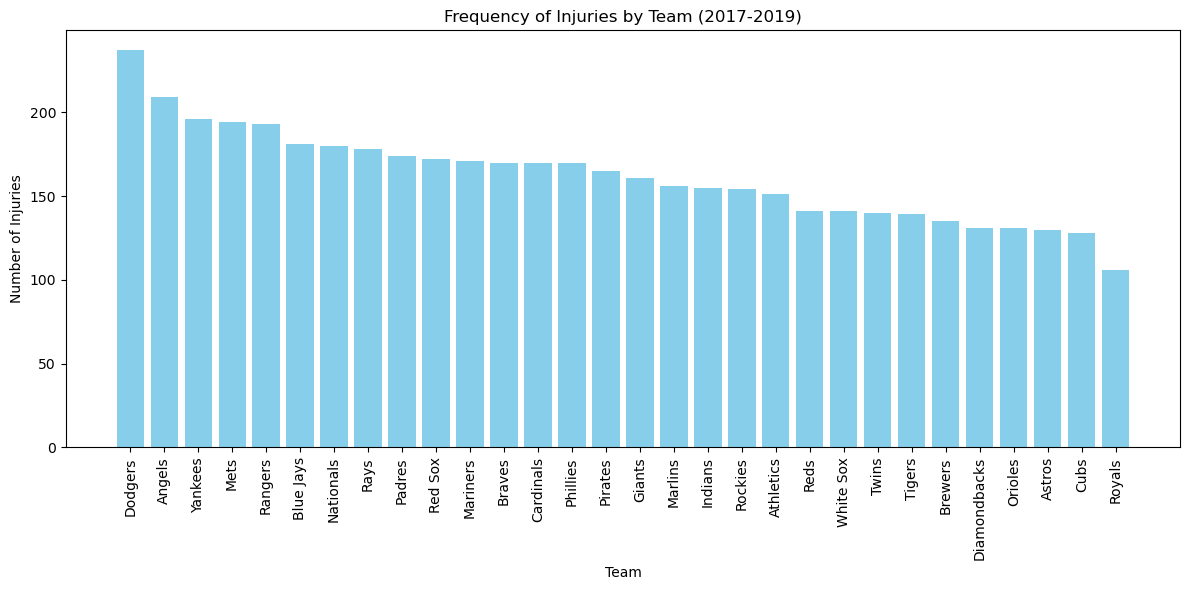

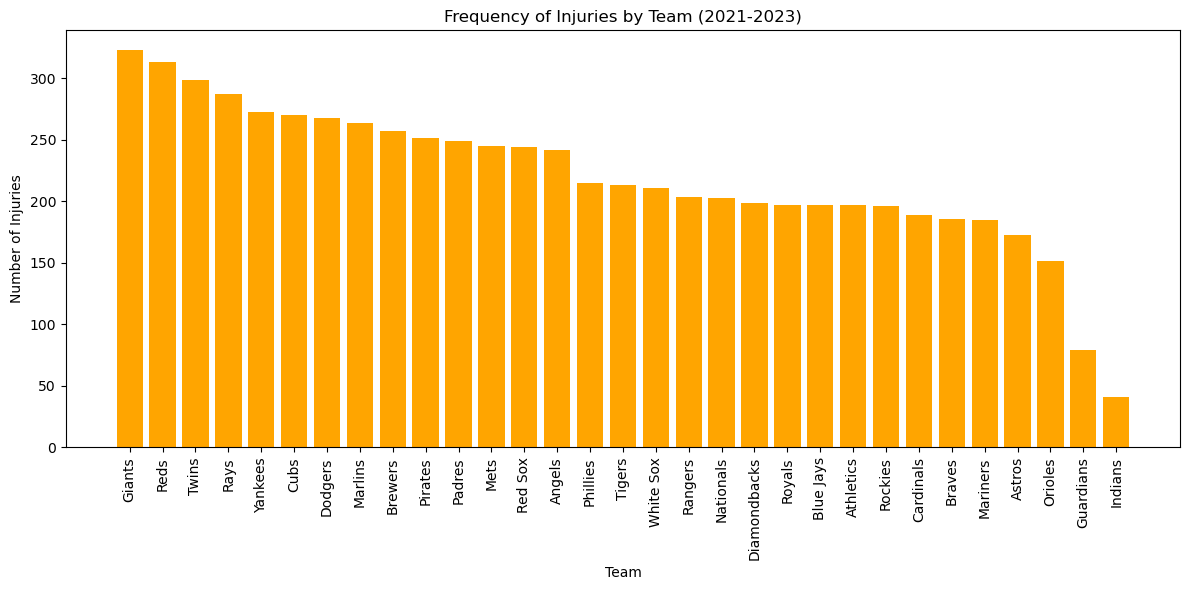

Win/Loss Ratios for Similar Teams (2017-2019):
Red Sox vs Phillies - Win/Loss Ratios: 1.43 vs 0.88
Rangers vs Mets - Win/Loss Ratios: 0.85 vs 0.92
Rockies vs Tigers - Win/Loss Ratios: 1.03 vs 0.56
Phillies vs Mariners - Win/Loss Ratios: 0.88 vs 0.94
Rangers vs Yankees - Win/Loss Ratios: 0.85 vs 1.50
Mariners vs Cardinals - Win/Loss Ratios: 0.94 vs 1.15
Braves vs Cardinals - Win/Loss Ratios: 1.12 vs 1.15
Red Sox vs Marlins - Win/Loss Ratios: 1.43 vs 0.68
Braves vs Rays - Win/Loss Ratios: 1.12 vs 1.21
Giants vs Phillies - Win/Loss Ratios: 0.79 vs 0.88
Pirates vs Marlins - Win/Loss Ratios: 0.87 vs 0.68
Yankees vs Rangers - Win/Loss Ratios: 1.50 vs 0.85
Yankees vs Nationals - Win/Loss Ratios: 1.50 vs 1.29
Cardinals vs Phillies - Win/Loss Ratios: 1.15 vs 0.88
Giants vs Marlins - Win/Loss Ratios: 0.79 vs 0.68
Pirates vs Rays - Win/Loss Ratios: 0.87 vs 1.21
Tigers vs Orioles - Win/Loss Ratios: 0.56 vs 0.57
Mets vs Yankees - Win/Loss Ratios: 0.92 vs 1.50
Blue Jays vs Rays - Win/Loss Ratios: 0.

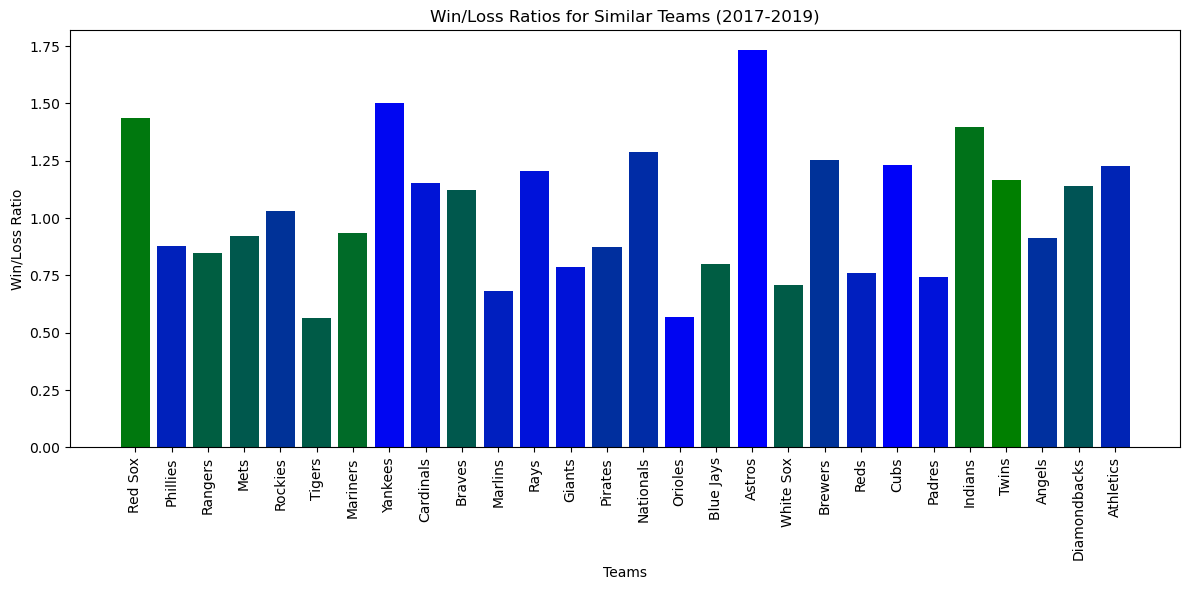

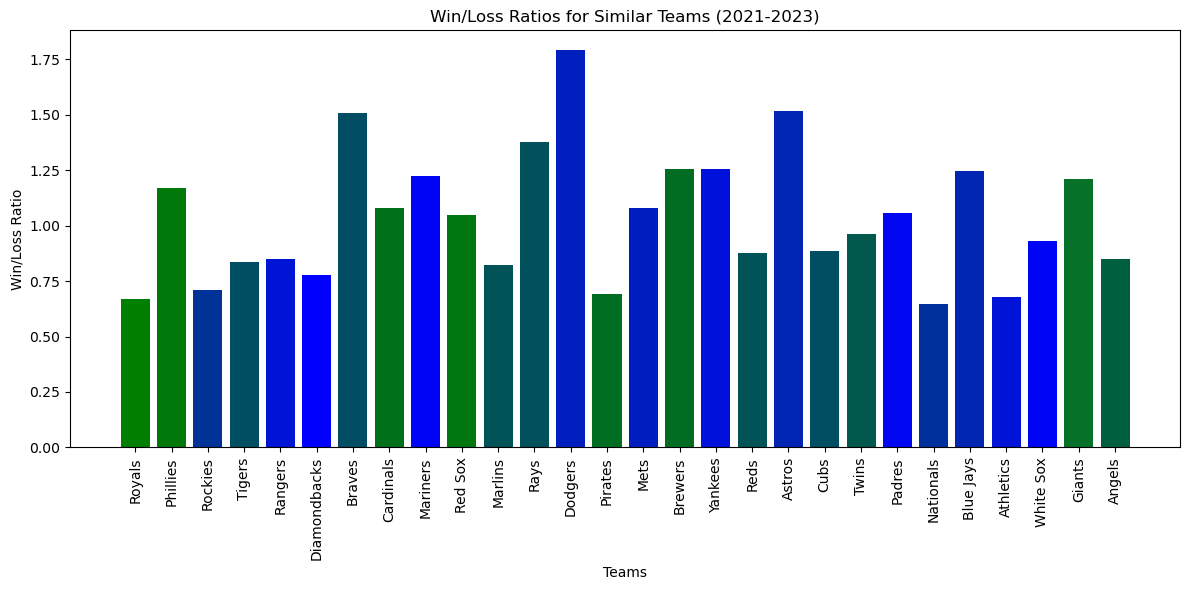

In [22]:
# File paths
injury_file_path = 'injury_report_cleaned.csv'
game_stats_2017_2019_path = 'data/2017-2019_gamestats.csv'
game_stats_2021_2023_path = 'data/2021-2023_gamestats.csv'

# Step 1: Load the Injury Report and Win/Loss Data
injury_df = pd.read_csv(injury_file_path)
game_stats_2017_2019 = pd.read_csv(game_stats_2017_2019_path)
game_stats_2021_2023 = pd.read_csv(game_stats_2021_2023_path)

# Step 2: Process Injury Data to Find Teams with Similar Injury Frequencies
# Extract injury frequency for the periods 2017-2019 and 2021-2023
injury_df['Date'] = pd.to_datetime(injury_df['Date'], errors='coerce')
injury_df['Year'] = injury_df['Date'].dt.year

injury_2017_2019 = injury_df[(injury_df['Year'] >= 2017) & (injury_df['Year'] <= 2019)]
team_injury_counts_2017_2019 = injury_2017_2019['Team'].value_counts()

injury_2021_2023 = injury_df[(injury_df['Year'] >= 2021) & (injury_df['Year'] <= 2023)]
team_injury_counts_2021_2023 = injury_2021_2023['Team'].value_counts()

# Plotting the injury frequency graphs for both periods
plt.figure(figsize=(12, 6))
plt.bar(team_injury_counts_2017_2019.index, team_injury_counts_2017_2019.values, color='skyblue')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.title('Frequency of Injuries by Team (2017-2019)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(team_injury_counts_2021_2023.index, team_injury_counts_2021_2023.values, color='orange')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.title('Frequency of Injuries by Team (2021-2023)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Define a threshold for similar injury frequencies (e.g., within 10%)
threshold = 0.10

# Helper function to find teams with similar injury frequencies
def find_similar_teams(team_injury_counts, threshold):
    similar_teams = []
    for team, count in team_injury_counts.items():
        for other_team, other_count in team_injury_counts.items():
            if team != other_team and abs(count - other_count) / count <= threshold:
                similar_teams.append((team, other_team))
    return list(set(similar_teams))

similar_teams_2017_2019 = find_similar_teams(team_injury_counts_2017_2019, threshold)
similar_teams_2021_2023 = find_similar_teams(team_injury_counts_2021_2023, threshold)

# Step 3: Create a mapping between full team names and abbreviations
team_name_mapping = {
    'Diamondbacks': 'ARI',
    'Cardinals': 'SLN',
    'Rays': 'TBA',
    'Orioles': 'BAL',
    'Red Sox': 'BOS',
    'Reds': 'CIN',
    'Astros': 'HOU',
    'Dodgers': 'LAN',
    'Brewers': 'MIL',
    'Twins': 'MIN',
    'Mets': 'NYN',
    'Athletics': 'OAK',
    'Rangers': 'TEX',
    'Nationals': 'WAS',
    'White Sox': 'CHA',
    'Angels': 'ANA',
    'Rockies': 'COL',
    'Tigers': 'DET',
    'Phillies': 'PHI',
    'Pirates': 'PIT',
    'Padres': 'SDN',
    'Cubs': 'CHN',
    'Royals': 'KCA',
    'Yankees': 'NYA',
    'Mariners': 'SEA',
    'Giants': 'SFN',
    'Indians': 'CLE',
    'Marlins': 'MIA',
    'Blue Jays': 'TOR',
    'Braves': 'ATL',
    'Guardians': 'CLE'  # Guardians is the updated name for Indians
}

# Step 4: Compare Win/Loss Records for Similar Teams
# Define a function to calculate win/loss ratio from game stats using team name mapping
def calculate_win_loss_ratio(game_stats, team_name_full):
    # Convert the full team name to the abbreviation using the mapping
    team_name = team_name_mapping.get(team_name_full)
    if not team_name:
        return 0  # If team name is not in the mapping, return 0

    # Count wins and losses using 'wteam' and 'lteam' columns
    wins = len(game_stats[game_stats['wteam'] == team_name])
    losses = len(game_stats[game_stats['lteam'] == team_name])
    return wins / max(losses, 1)  # Avoid division by zero

# Compare win/loss ratios for similar teams in 2017-2019
win_loss_ratios_2017_2019 = []
print("Win/Loss Ratios for Similar Teams (2017-2019):")
for team_1, team_2 in similar_teams_2017_2019:
    win_loss_ratio_team_1 = calculate_win_loss_ratio(game_stats_2017_2019, team_1)
    win_loss_ratio_team_2 = calculate_win_loss_ratio(game_stats_2017_2019, team_2)
    win_loss_ratios_2017_2019.append((team_1, win_loss_ratio_team_1, team_2, win_loss_ratio_team_2))
    print(f"{team_1} vs {team_2} - Win/Loss Ratios: {win_loss_ratio_team_1:.2f} vs {win_loss_ratio_team_2:.2f}")

# Compare win/loss ratios for similar teams in 2021-2023
win_loss_ratios_2021_2023 = []
print("\nWin/Loss Ratios for Similar Teams (2021-2023):")
for team_1, team_2 in similar_teams_2021_2023:
    win_loss_ratio_team_1 = calculate_win_loss_ratio(game_stats_2021_2023, team_1)
    win_loss_ratio_team_2 = calculate_win_loss_ratio(game_stats_2021_2023, team_2)
    win_loss_ratios_2021_2023.append((team_1, win_loss_ratio_team_1, team_2, win_loss_ratio_team_2))
    print(f"{team_1} vs {team_2} - Win/Loss Ratios: {win_loss_ratio_team_1:.2f} vs {win_loss_ratio_team_2:.2f}")

# Plotting Win/Loss Ratios for Similar Teams
# 2017-2019
plt.figure(figsize=(12, 6))
for team_1, ratio_1, team_2, ratio_2 in win_loss_ratios_2017_2019:
    plt.bar(team_1, ratio_1, color='blue', alpha=0.6, label=team_1)
    plt.bar(team_2, ratio_2, color='green', alpha=0.6, label=team_2)
plt.xlabel('Teams')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratios for Similar Teams (2017-2019)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2021-2023
plt.figure(figsize=(12, 6))
for team_1, ratio_1, team_2, ratio_2 in win_loss_ratios_2021_2023:
    plt.bar(team_1, ratio_1, color='blue', alpha=0.6, label=team_1)
    plt.bar(team_2, ratio_2, color='green', alpha=0.6, label=team_2)
plt.xlabel('Teams')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratios for Similar Teams (2021-2023)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Summary Analysis

#### 1. Injury Frequency vs. Performance

- **Data Grouping**:  
  Teams from two periods (**2017-2019** and **2021-2023**) were grouped based on injury frequency using a threshold of **0.1** for similarity.

- **Visualization**:  
  Bar charts were used to depict injury counts across the periods.

- **Objective**:  
  Analyze if teams with similar injury rates had comparable win/loss ratios.

- **Findings**:  
  Injury frequency alone does not strongly correlate with team performance.


#### 2. Similar Teams Comparison by Win/Loss Ratios

- **Teams with similar injury frequencies were compared**:
  - **Example 1**:
    - **2017-2019**: Despite similar injury rates, the **Phillies** (win/loss ratio: **0.88**) outperformed the **Marlins** (**0.68**).
  - **Example 2**:
    - **2021-2023**: The **Rockies** outperformed the **Athletics** in win/loss ratios, despite comparable injury rates.

- **Conclusion**:  
  Similar injury rates do not guarantee similar performance, suggesting the influence of external factors like roster depth and management.
### 3. Performance Trends Across Periods

- **General Observations**:
  - High injury counts **negatively impact performance**, but the relationship is neither linear nor consistent.
  - Certain teams, such as the **Dodgers**, performed well even with high injury counts, indicating strong depth and effective management.
  - Conversely, teams like the **Royals**, with lower injuries, still struggled, showing that success depends on more than just avoiding injuries.
  
- **Key Insight**:  
  Factors like squad quality, tactical decisions, and player form significantly impact outcomes.

### 4. Notable Findings

- **Threshold-Based Analysis**:  
  Setting an injury frequency threshold (**0.1**) allowed focused comparisons between teams with similar injury rates.

- **Team Depth and Management**:  
  - Teams like the **Dodgers** and **Yankees** maintained strong performance despite injuries, emphasizing the role of squad depth and injury management.

- **Impact of Low Injuries**:  
  - Teams like the **Royals**, with few injuries, still failed to capitalize on their advantage, highlighting the importance of other performance factors.

## Scoring vs. Temperature and Windspeed 

#### **Scoring vs. Temperature**

##### Graph for the 2017 to 2019 Seasons (Pre-Covid) Average Scores per Temperature.

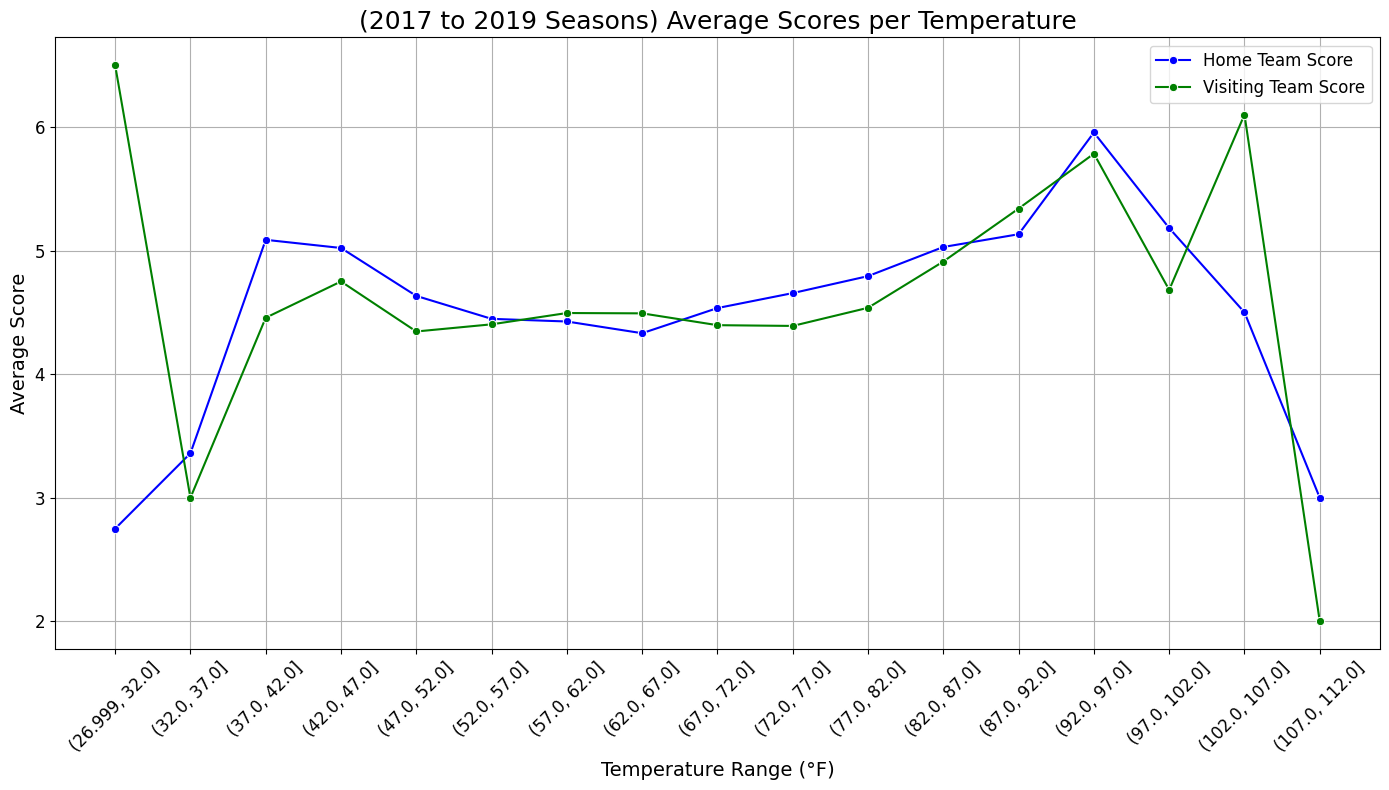

In [12]:
import seaborn as sns
import numpy as np

field_data_pre_covid['Temperature'] = pd.to_numeric(field_data_pre_covid['Temperature'])
field_data_post_covid['Temperature'] = pd.to_numeric(field_data_post_covid['Temperature'])

field_data_pre_covid = field_data_pre_covid.dropna(subset=['Temperature'])
field_data_post_covid = field_data_post_covid.dropna(subset=['Temperature'])

tick_interval = 5  
min_temp = int(min(field_data_pre_covid['Temperature'].min(), field_data_post_covid['Temperature'].min()))
max_temp = int(max(field_data_pre_covid['Temperature'].max(), field_data_post_covid['Temperature'].max()))
bins = np.arange(min_temp, max_temp + tick_interval, tick_interval)

field_data_pre_covid['Temp_Bin'] = pd.cut(field_data_pre_covid['Temperature'], bins=bins, include_lowest=True)
field_data_post_covid['Temp_Bin'] = pd.cut(field_data_post_covid['Temperature'], bins=bins, include_lowest=True)

pre_covid_grouped = field_data_pre_covid.groupby('Temp_Bin', observed=True)[['Home Team Score', 'Visiting Team Score']].mean().reset_index()
post_covid_grouped = field_data_post_covid.groupby('Temp_Bin', observed=True)[['Home Team Score', 'Visiting Team Score']].mean().reset_index()

pre_covid_grouped['Temp_Bin'] = pre_covid_grouped['Temp_Bin'].astype(str)
post_covid_grouped['Temp_Bin'] = post_covid_grouped['Temp_Bin'].astype(str)

plt.figure(figsize=(14, 8))
sns.lineplot(x='Temp_Bin',y='Home Team Score',data=pre_covid_grouped,marker='o',label='Home Team Score',color='blue')
sns.lineplot(x='Temp_Bin',y='Visiting Team Score',data=pre_covid_grouped,marker='o',label='Visiting Team Score',color='green')
plt.title('(2017 to 2019 Seasons) Average Scores per Temperature', fontsize=18)
plt.xlabel('Temperature Range (°F)', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In this section, this analyzes how different temperature ranges affect the average scores of the home and visiting teams during the 2017 to 2019 seasons. It converts the 'temperature' data into numerical types, removing any missing values and finalizing it by placing each respective temperature in their temperature degree interval. After that, it calculates the mean scores for both the home and visiting teams, and we get this line plot. Looking at the plot, in the extreme ends of the weather (31 to 37 degrees Fahrenheit and 97 to 102 degrees Fahrenheit), there is around a 1 to 2 point increase going from colder temperatures to hotter temperatures. It also averages out when it's more normal temperatures (37 to 97 degrees), where there isn't a large difference in average scores; this would be an indicator of player comfort in warmer weather, contributing to higher average scores.

#### Graph for the 2021 to 2023 Seasons (Post-Covid) Average Scores per Temperature.

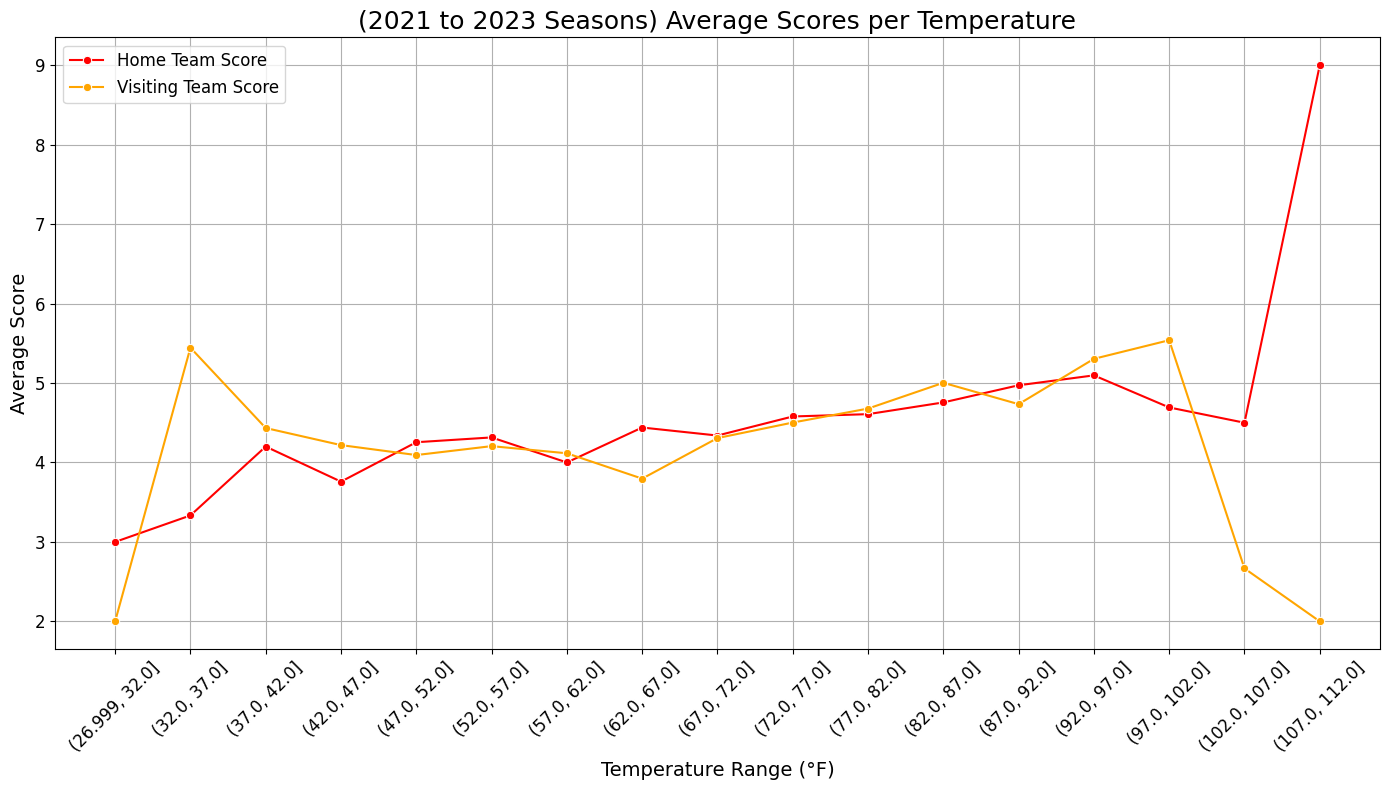

In [13]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Temp_Bin',y='Home Team Score',data=post_covid_grouped,marker='o',label='Home Team Score',color='red')
sns.lineplot(x='Temp_Bin',y='Visiting Team Score',data=post_covid_grouped,marker='o',label='Visiting Team Score',color='orange')
plt.title('(2021 to 2023 Seasons) Average Scores per Temperature', fontsize=18)
plt.xlabel('Temperature Range (°F)', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Using the same method as the previous plot, we get this line plot, the post-covid seasons (2021 to 2023) average scores per temperature. Similar to the previous graph, it also shows a gradual increase in scores when the temperature is higher. In the ends of the plot, where the weather is at its lowest and highest point, the visiting team appears to score an average of 1 to 2 points higher than the home team. This would indicate that the visiting team had better preparation from their staff to account for player fatigue in high temperatures and form plays based on the weather patterns.

#### Combined Graph for (2017 to 2019 Seasons) and (2021 to 2023 Seasons)

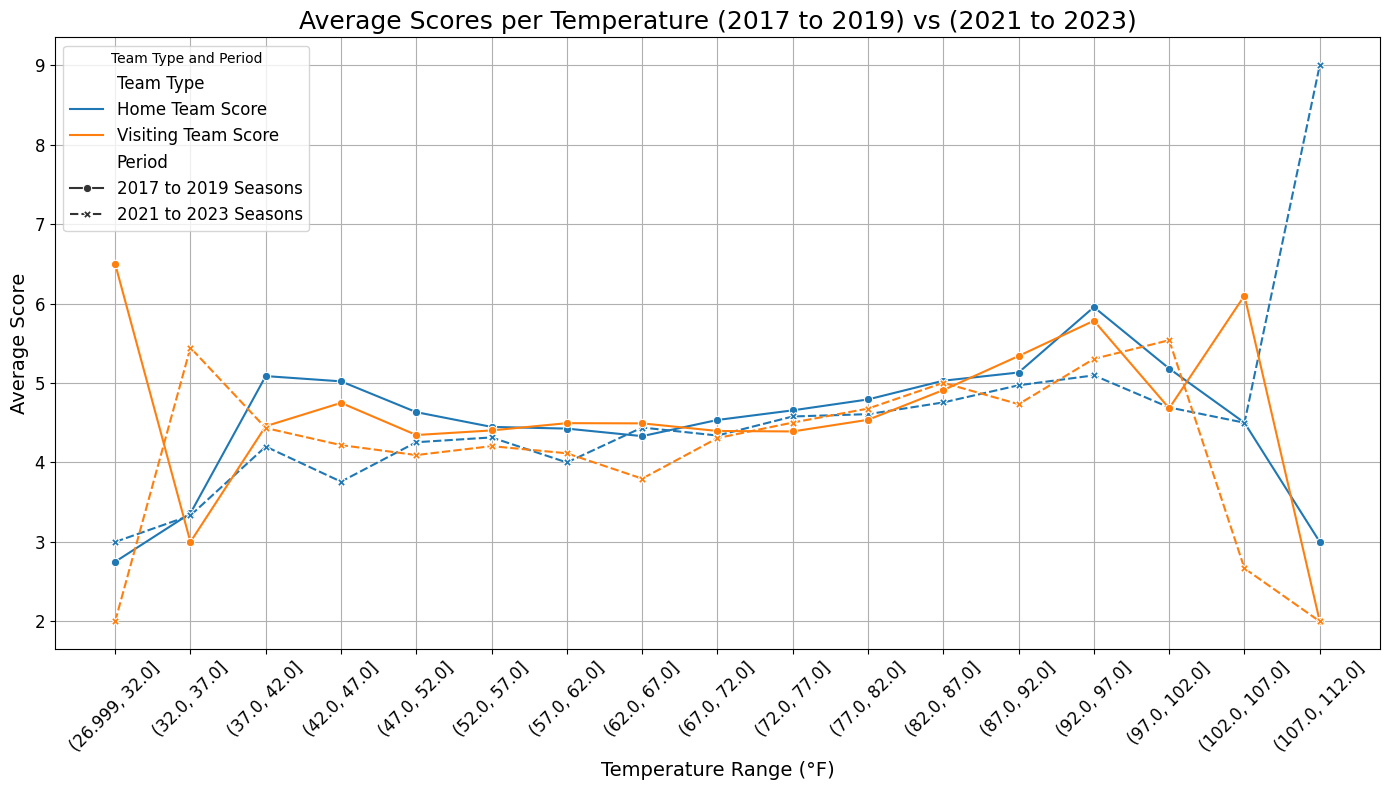

In [14]:
pre_covid_grouped['Period'] = '2017 to 2019 Seasons'
post_covid_grouped['Period'] = '2021 to 2023 Seasons'

combined_grouped = pd.concat([pre_covid_grouped, post_covid_grouped])

total_temperature = pd.melt(combined_grouped,id_vars=['Temp_Bin', 'Period'],value_vars=['Home Team Score', 'Visiting Team Score'],var_name='Team Type',value_name='Average Score')

plt.figure(figsize=(14, 8))
sns.lineplot(x='Temp_Bin',y='Average Score',hue='Team Type',style='Period',markers=True,data=total_temperature)
plt.title('Average Scores per Temperature (2017 to 2019) vs (2021 to 2023)', fontsize=18)
plt.xlabel('Temperature Range (°F)', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Team Type and Period', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

When combining the two plots from pre-covid and post-covid, we get this line plot. Observing the line plot, we can see that the scores are very consistent in normal temperatures, leaving not much of a difference in scores and the average scores gradually increases as the temperature rises. The only difference is at the end points of the graph, where we can see the lowest and highest degrees of weather. 

#### Calculating the win rate based on the temperature range

In [17]:
def add_win_columns(df):
    df['Home_Win'] = (df['Home Team Score'] > df['Visiting Team Score']).astype(int)
    df['Visiting_Win'] = (df['Visiting Team Score'] > df['Home Team Score']).astype(int)
    return df

field_data_pre_covid = add_win_columns(field_data_pre_covid)
field_data_post_covid = add_win_columns(field_data_post_covid)

def calculate_win_rates_temp(df):
    grouped = df.groupby('Temp_Bin', observed=True).agg(Total_Games=('Home Team Score', 'count'),Home_Wins=('Home_Win', 'sum'),Visiting_Wins=('Visiting_Win', 'sum')).reset_index()
    grouped['Home_Win_Rate'] = (grouped['Home_Wins'] / grouped['Total_Games']) * 100
    grouped['Visiting_Win_Rate'] = (grouped['Visiting_Wins'] / grouped['Total_Games']) * 100
    win_rates = grouped[['Temp_Bin', 'Home_Win_Rate', 'Visiting_Win_Rate']]
    return win_rates

win_rates_pre_covid_temp = calculate_win_rates_temp(field_data_pre_covid)
win_rates_post_covid_temp = calculate_win_rates_temp(field_data_post_covid)

win_rates_pre_covid_temp['Home_Win_Rate'] = win_rates_pre_covid_temp['Home_Win_Rate'].round(2)
win_rates_pre_covid_temp['Visiting_Win_Rate'] = win_rates_pre_covid_temp['Visiting_Win_Rate'].round(2)
win_rates_post_covid_temp['Home_Win_Rate'] = win_rates_post_covid_temp['Home_Win_Rate'].round(2)
win_rates_post_covid_temp['Visiting_Win_Rate'] = win_rates_post_covid_temp['Visiting_Win_Rate'].round(2)

win_rates_pre_covid_temp['Temp_Bin'] = win_rates_pre_covid_temp['Temp_Bin'].astype(str)
win_rates_post_covid_temp['Temp_Bin'] = win_rates_post_covid_temp['Temp_Bin'].astype(str)

win_rates_pre_covid_temp.rename(columns={'Temp_Bin': 'Temperature'}, inplace=True)
win_rates_post_covid_temp.rename(columns={'Temp_Bin': 'Temperature'}, inplace=True)

print("(2017 to 2019 Seasons) Win Rates per Temperature Range:")
print(win_rates_pre_covid_temp)

print("\n(2021 to 2023 Seasons) Win Rates per Temperature Range:")
print(win_rates_post_covid_temp)


(2017 to 2019 Seasons) Win Rates per Temperature Range:
       Temperature  Home_Win_Rate  Visiting_Win_Rate
0   (26.999, 32.0]          50.00              50.00
1     (32.0, 37.0]          48.00              52.00
2     (37.0, 42.0]          63.04              36.96
3     (42.0, 47.0]          52.08              47.92
4     (47.0, 52.0]          56.12              43.88
5     (52.0, 57.0]          52.82              47.18
6     (57.0, 62.0]          51.82              48.18
7     (62.0, 67.0]          50.43              49.57
8     (67.0, 72.0]          54.55              45.45
9     (72.0, 77.0]          53.62              46.38
10    (77.0, 82.0]          53.46              46.54
11    (82.0, 87.0]          54.44              45.56
12    (87.0, 92.0]          52.12              47.88
13    (92.0, 97.0]          52.24              47.76
14   (97.0, 102.0]          58.82              41.18

(2021 to 2023 Seasons) Win Rates per Temperature Range:
       Temperature  Home_Win_Rate  Visi

In this section, we calculate the win rate percentages based on the interval of temperatures, for both the (2017 to 2019) Season and the (2021 to 2023) Season. For this, we added two new columns, `Home_Win` and `Visiting_Win`. It groups together the temperature data and aggregates the total number of games that were on the dataset and wins from each team type. For more clarity and structure, we converted them into percentages and rounded them up to two decimal places. This table will give us a more clearer look at how temperature affects scoring, numerically. Observing the table, the home team has a higher win rate percentage than the visiting team in the pre-covid seasons, while in the post-covid seasons, we can see that rates are closer to being 50-50, with the visiting team having a higher win rate in the ends of the weather interval.

### **Scoring vs Windspeed**

#### Graph for the 2017 to 2019 Seasons (Pre-Covid) Average Scores per Wind Speed

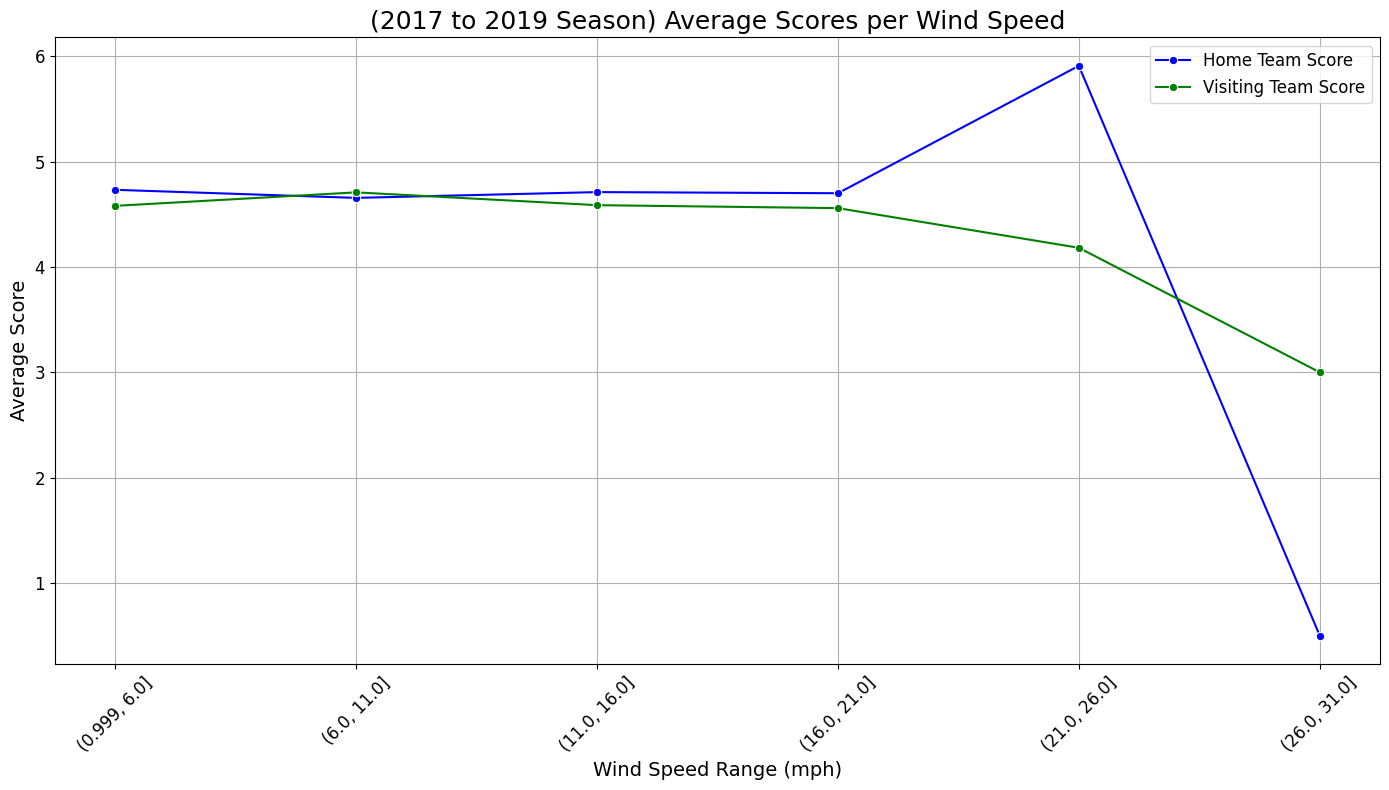

In [18]:
field_data_pre_covid['Windspeed'] = pd.to_numeric(field_data_pre_covid['Windspeed'])
field_data_post_covid['Windspeed'] = pd.to_numeric(field_data_post_covid['Windspeed'])

pre_covid = field_data_pre_covid.dropna(subset=['Windspeed'])
post_covid = field_data_post_covid.dropna(subset=['Windspeed'])

pre_covid = pre_covid[pre_covid['Windspeed'] > 0]
post_covid = post_covid[post_covid['Windspeed'] > 0]

wind_interval = 5
min_wind = int(min(pre_covid['Windspeed'].min(), post_covid['Windspeed'].min()))
max_wind = int(max(pre_covid['Windspeed'].max(), post_covid['Windspeed'].max()))
bins = np.arange(min_wind, max_wind + wind_interval, wind_interval)

pre_covid['Wind_Bin'] = pd.cut(pre_covid['Windspeed'], bins=bins, include_lowest=True)
post_covid['Wind_Bin'] = pd.cut(post_covid['Windspeed'], bins=bins, include_lowest=True)

pre_covid_wind_grouped = pre_covid.groupby('Wind_Bin', observed=True)[['Home Team Score', 'Visiting Team Score']].mean().reset_index()
post_covid_wind_grouped = post_covid.groupby('Wind_Bin', observed=True)[['Home Team Score', 'Visiting Team Score']].mean().reset_index()

pre_covid_wind_grouped['Wind_Bin'] = pre_covid_wind_grouped['Wind_Bin'].astype(str)
post_covid_wind_grouped['Wind_Bin'] = post_covid_wind_grouped['Wind_Bin'].astype(str)

plt.figure(figsize=(14, 8))
sns.lineplot(x='Wind_Bin',y='Home Team Score',data=pre_covid_wind_grouped,marker='o',label='Home Team Score',color='blue')
sns.lineplot(x='Wind_Bin',y='Visiting Team Score',data=pre_covid_wind_grouped,marker='o',label='Visiting Team Score',color='green')
plt.title('(2017 to 2019 Season) Average Scores per Wind Speed', fontsize=18)
plt.xlabel('Wind Speed Range (mph)', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In this section, we will be analyzing how different wind speeds affect the average scores of home and visiting teams during the 2017 to 2019 seasons. Similar to the method above with the temperature, we convert the wind speed data into a numerical value and removed any missing or non-positive values. It is then categorized into intervals of 5 mph speeds, with the mean scores for both home and visiting teams. Then we get this line plot displaying the average scores with their respective wind speeds. Observing the graph, we can see that the average scores don't differentiate from 0.999 to 21 mph, between the home and visiting teams. As it gradually increases past 21 mph, we can see a difference in scoring of 1 to 2 points, as it reaches the extremes of wind speeds. 

#### Graph for the 2021 to 2023 Seasons (Post-Covid) Average Scores per Wind Speed

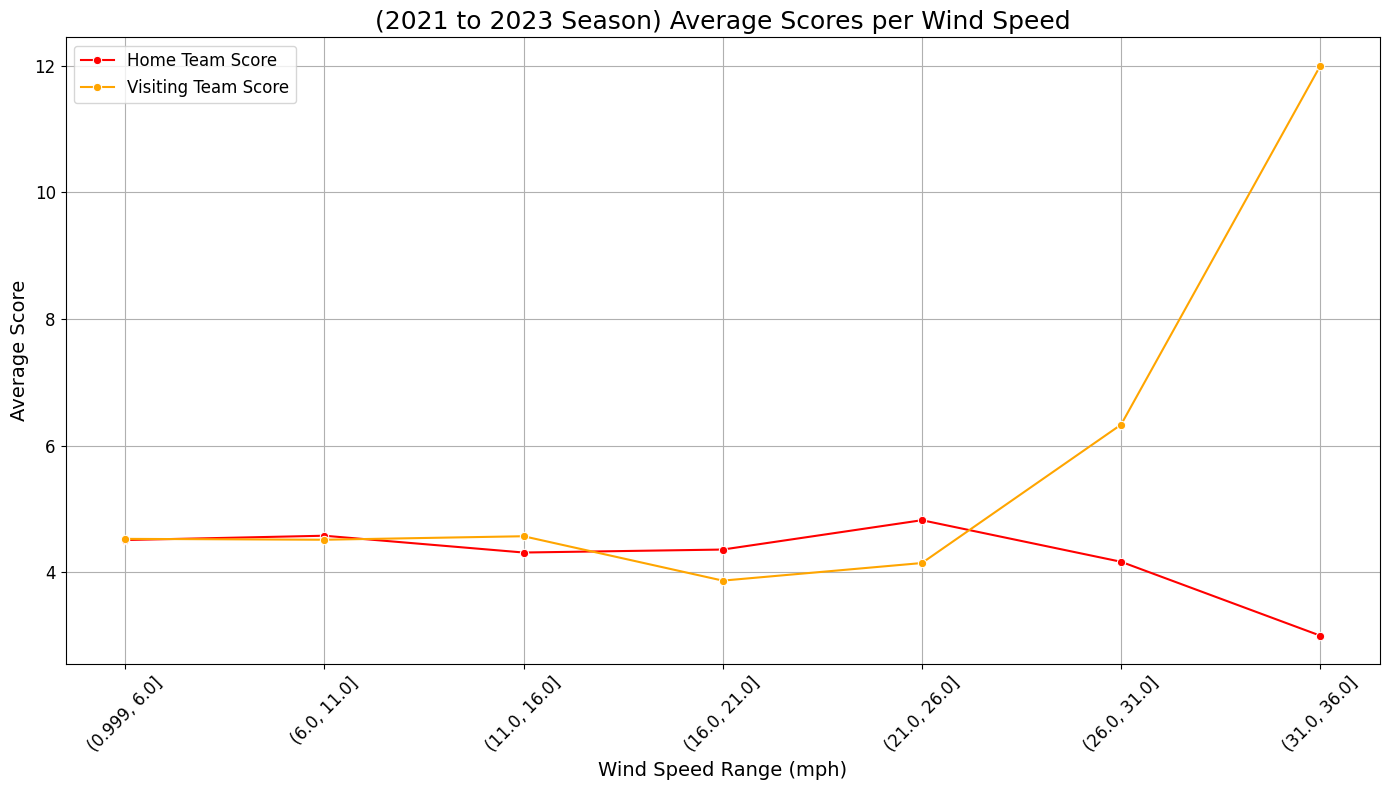

In [19]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Wind_Bin',y='Home Team Score',data=post_covid_wind_grouped,marker='o',label='Home Team Score',color='red')
sns.lineplot(x='Wind_Bin',y='Visiting Team Score',data=post_covid_wind_grouped,marker='o',label='Visiting Team Score',color='orange')
plt.title('(2021 to 2023 Season) Average Scores per Wind Speed', fontsize=18)
plt.xlabel('Wind Speed Range (mph)', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Using the same method as above, we get this line plot of the 2021 to 2023 Season scoring vs. wind speeds. Observing the graph, it stays consistent just like the previous seasons, at a lower average scoring, but the difference isn't too much. As it gradually increases in wind speed, we can start to see a prominent difference in scoring, but in the more extreme wind speeds that rarely occur. 

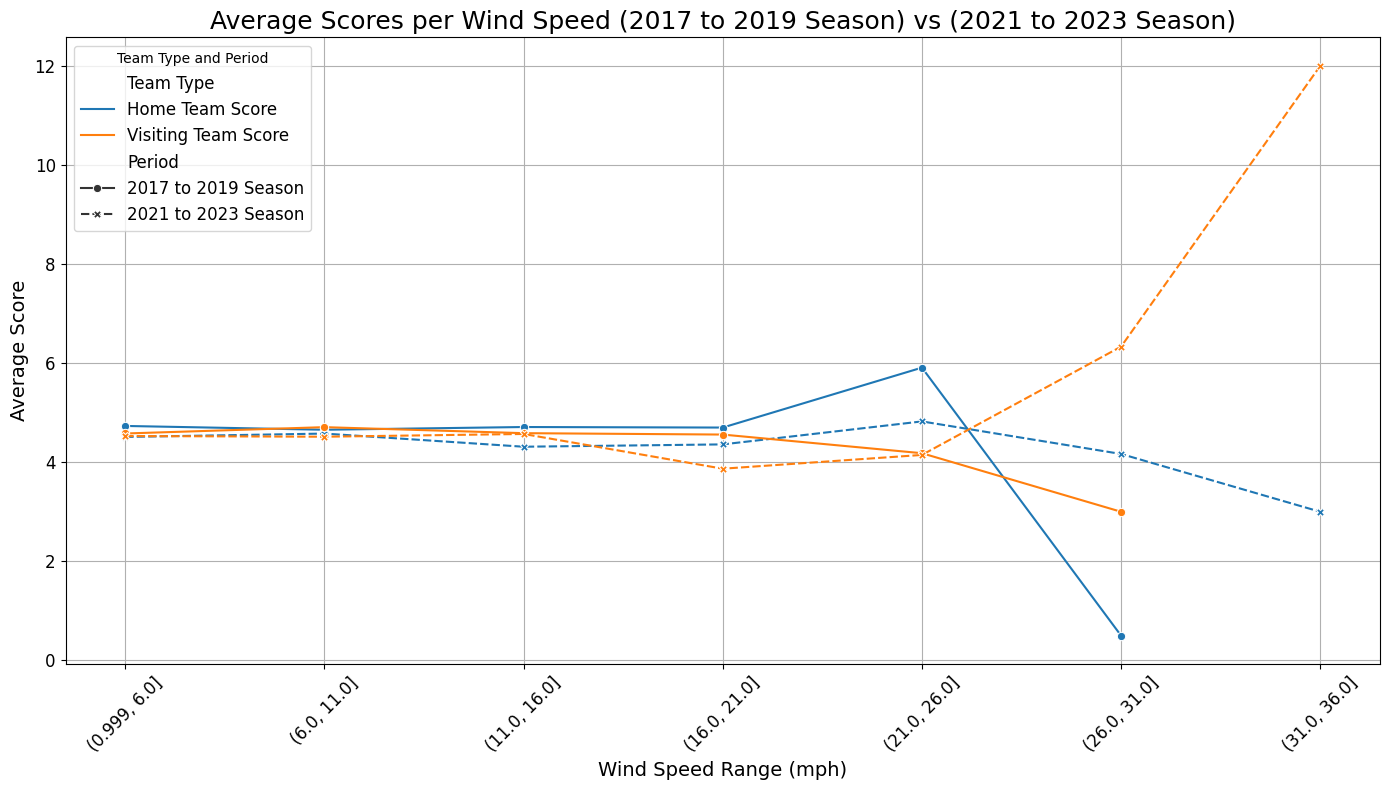

In [20]:
pre_covid_wind_grouped['Period'] = '2017 to 2019 Season'
post_covid_wind_grouped['Period'] = '2021 to 2023 Season'

combined_wind_grouped = pd.concat([pre_covid_wind_grouped, post_covid_wind_grouped])
combined_wind = pd.melt(combined_wind_grouped,id_vars=['Wind_Bin', 'Period'],value_vars=['Home Team Score', 'Visiting Team Score'],var_name='Team Type',value_name='Average Score')

plt.figure(figsize=(14, 8))
sns.lineplot(x='Wind_Bin',y='Average Score',hue='Team Type',style='Period',markers=True,data=combined_wind)
plt.title('Average Scores per Wind Speed (2017 to 2019 Season) vs (2021 to 2023 Season)', fontsize=18)
plt.xlabel('Wind Speed Range (mph)', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Team Type and Period', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Now we combine the two periods (Pre-Covid and Post-Covid) to get this line plot. Observing it at the full plot, it is clear that wind speeds don't affect much of the average scores at the lower speeds, but as the wind speeds gradually increase, we see a lower average amongst the home team's average scores, but higher average scores in the visiting team, by 2 to 9 points. 

In [22]:
def add_win_columns(df):
    df['Home_Win'] = (df['Home Team Score'] > df['Visiting Team Score']).astype(int)
    df['Visiting_Win'] = (df['Visiting Team Score'] > df['Home Team Score']).astype(int)
    return df

field_data_pre_covid = add_win_columns(field_data_pre_covid)
field_data_post_covid = add_win_columns(field_data_post_covid)

def calculate_win_rates(df):
    grouped = df.groupby('Wind_Bin', observed=True).agg(Total_Games=('Home Team Score', 'count'),Home_Wins=('Home_Win', 'sum'),Visiting_Wins=('Visiting_Win', 'sum')).reset_index()
    grouped['Home_Win_Rate'] = (grouped['Home_Wins'] / grouped['Total_Games']) * 100
    grouped['Visiting_Win_Rate'] = (grouped['Visiting_Wins'] / grouped['Total_Games']) * 100
    win_rates = grouped[['Wind_Bin', 'Home_Win_Rate', 'Visiting_Win_Rate']]
    return win_rates

win_rates_pre_covid = calculate_win_rates(pre_covid)
win_rates_post_covid = calculate_win_rates(post_covid)

win_rates_pre_covid['Home_Win_Rate'] = win_rates_pre_covid['Home_Win_Rate'].round(2)
win_rates_pre_covid['Visiting_Win_Rate'] = win_rates_pre_covid['Visiting_Win_Rate'].round(2)
win_rates_post_covid['Home_Win_Rate'] = win_rates_post_covid['Home_Win_Rate'].round(2)
win_rates_post_covid['Visiting_Win_Rate'] = win_rates_post_covid['Visiting_Win_Rate'].round(2)

win_rates_pre_covid['Wind_Bin'] = win_rates_pre_covid['Wind_Bin'].astype(str)
win_rates_post_covid['Wind_Bin'] = win_rates_post_covid['Wind_Bin'].astype(str)

win_rates_pre_covid.rename(columns={'Wind_Bin': 'Wind Speed'}, inplace=True)
win_rates_post_covid.rename(columns={'Wind_Bin': 'Wind Speed'}, inplace=True)

print("(2017 to 2019 Seasons) Win Rates per Wind Speed Range:")
print(win_rates_pre_covid)

print("\n(2021 to 2023 Seasons) Win Rates per Wind Speed Range:")
print(win_rates_post_covid)

(2017 to 2019 Seasons) Win Rates per Wind Speed Range:
     Wind Speed  Home_Win_Rate  Visiting_Win_Rate
0  (0.999, 6.0]          53.73              46.27
1   (6.0, 11.0]          51.46              48.54
2  (11.0, 16.0]          53.83              46.17
3  (16.0, 21.0]          54.42              45.58
4  (21.0, 26.0]          63.64              36.36
5  (26.0, 31.0]           0.00             100.00

(2021 to 2023 Seasons) Win Rates per Wind Speed Range:
     Wind Speed  Home_Win_Rate  Visiting_Win_Rate
0  (0.999, 6.0]          52.59              47.41
1   (6.0, 11.0]          53.17              46.83
2  (11.0, 16.0]          50.55              49.45
3  (16.0, 21.0]          57.01              42.99
4  (21.0, 26.0]          58.82              41.18
5  (26.0, 31.0]          16.67              83.33
6  (31.0, 36.0]           0.00             100.00


Similar to the table for the temperature, this table presents the win rates when wind speed is in effect. Looking at the table, it is clear that the home team has a higher win rate in lower wind speeds but as it gradually increase in speed, the visiting team's win rate becomes much larger. 

Using multiple linear regression to assess the impact of both the Home Team's Score vs. Temperature and Windspeed.

In [31]:
import statsmodels.api as sm

combined_data = pd.concat([field_data_pre_covid, field_data_post_covid], ignore_index=True)

def regression(X, y, title):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    
    plt.figure(figsize=(8,6))
    sns.regplot(x=X.iloc[:,1], y=y)
    plt.title(title)
    plt.xlabel(X.columns[1])
    plt.ylabel('Score')
    plt.show()
    
    return model

#### Results for Home Team Score vs. Temperature

                            OLS Regression Results                            
Dep. Variable:        Home Team Score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     67.64
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.12e-16
Time:                        11:29:52   Log-Likelihood:                -38102.
No. Observations:               14805   AIC:                         7.621e+04
Df Residuals:                   14803   BIC:                         7.622e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.0992      0.184     16.862      

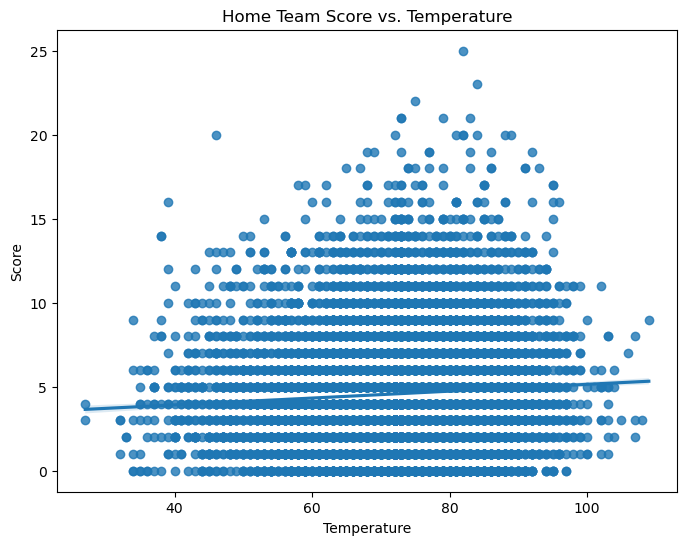

In [32]:
model_home_temp = regression(combined_data['Temperature'], combined_data['Home Team Score'], 'Home Team Score vs. Temperature')

After conducting the OLS regression analysis, we get an R-squared value of 0.005, this would mean that there's a very weak relationship between the home team's scoring with temperature. But with a coefficient for the temperature at 0.0207 and a p-value of 0.000, it has a more statistically significant positive relationship, where per 1 degree, the home team scores increase by 0.0207 points on average. Although it has a statistically significant positive relationship, because of the low R-squared value, it means that the temperature has very little impact on how the home team scores. 

#### Results for Home Team Score vs. Wind Speed

                            OLS Regression Results                            
Dep. Variable:        Home Team Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05629
Date:                Wed, 11 Dec 2024   Prob (F-statistic):              0.812
Time:                        11:29:57   Log-Likelihood:                -38136.
No. Observations:               14805   AIC:                         7.628e+04
Df Residuals:                   14803   BIC:                         7.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5866      0.046    100.317      0.0

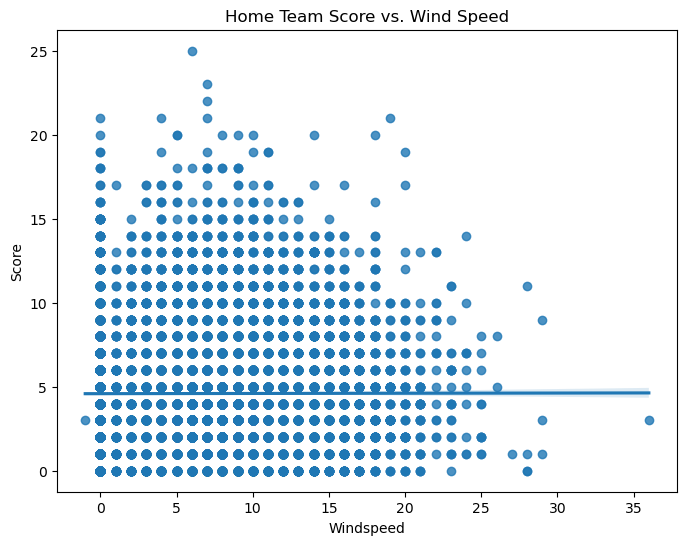

In [33]:
model_home_wind = regression(combined_data['Windspeed'], combined_data['Home Team Score'], 'Home Team Score vs. Wind Speed')

For the home team vs. wind speed analysis, we receive an R-squared value of 0.000, which indicates that the wind speed is not an influencing factor for the home team's scoring. As well, with a windspeed coefficient of 0.0013 and p-value of 0.809, there is also no statistically significant relationship between wind speed and the home team's scores. Therefore, wind speed does not have any meaningful impact on how the home team scores.

Then we look at the visiting team's score vs. temperature and wind speed.

In [34]:
def regression(X, y, title):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    
    # Plot
    plt.figure(figsize=(8,6))
    sns.regplot(x=X.iloc[:,1], y=y)
    plt.title(title)
    plt.xlabel(X.columns[1])
    plt.ylabel('Score')
    plt.show()
    return model

Using the Ordinary Least Squares regression analysis, we can further dive deep into the relationship between both temperature and wind speed with the home team score. 

#### Results for Visiting Team vs. Temperature

                             OLS Regression Results                            
Dep. Variable:     Visiting Team Score   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     80.76
Date:                 Wed, 11 Dec 2024   Prob (F-statistic):           2.85e-19
Time:                         11:30:02   Log-Likelihood:                -38385.
No. Observations:                14805   AIC:                         7.677e+04
Df Residuals:                    14803   BIC:                         7.679e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.8410      0.187     15

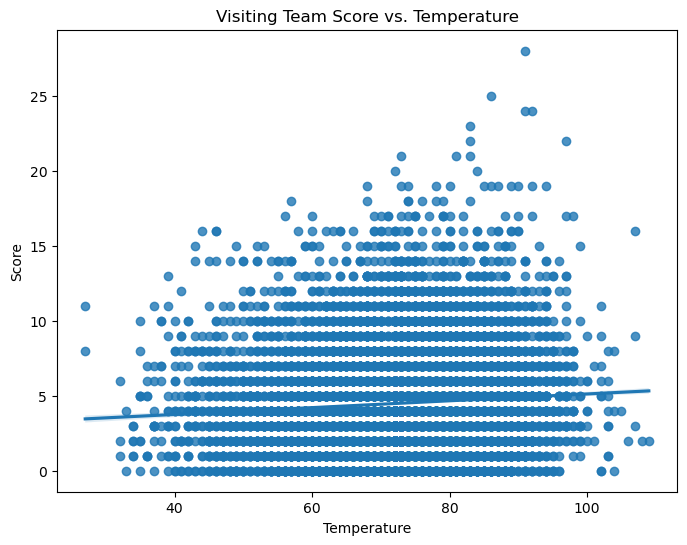

In [35]:
model_visiting_temp = regression(combined_data['Temperature'], combined_data['Visiting Team Score'], 'Visiting Team Score vs. Temperature')

Similar to the analysis with the home team, we now look at the relationship between the visiting team's scoring and temperature. After the OLS regression analysis, we get an R-squared value of 0.006, which explains that there is a weak relationship between temperature and the visiting team's scoring. With a temperature coefficient of 0.0233 with a p-value of 0.000, per 1 degree increase, the visiting team's score increases by 0.0233 points on average. Although it is statistically significant, due to the low R-squared value, there isn't much impact on how the visiting team scores with the influence of temperature.

#### Results for Visiting Team vs. Wind Speed

                             OLS Regression Results                            
Dep. Variable:     Visiting Team Score   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     10.23
Date:                 Wed, 11 Dec 2024   Prob (F-statistic):            0.00138
Time:                         11:30:06   Log-Likelihood:                -38421.
No. Observations:                14805   AIC:                         7.685e+04
Df Residuals:                    14803   BIC:                         7.686e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3853      0.047     94.08

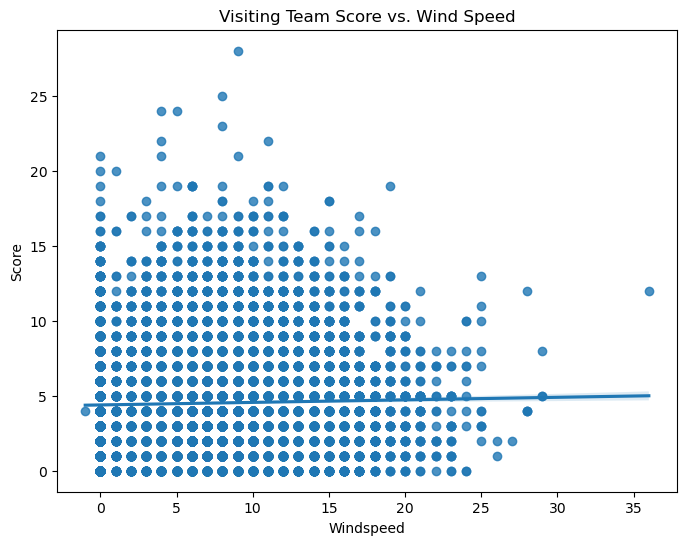

In [36]:
model_visiting_wind = regression(combined_data['Windspeed'], combined_data['Visiting Team Score'], 'Visiting Team Score vs. Wind Speed')

Looking at the OLS regression analysis for the visiting team vs. wind speed, we get an R-squared value of 0.001, also showing a very weak relationship between wind speed vs. the visiting team's scoring. With a wind speed coefficient of 0.0164, per 1 mph increase, the visiting team's score increase by 0.0164 points. Even though it appears to be statistically significant, because of the low R-squared value of 0.001, wind speed doesn't play a large role in affecting the visiting team's scoring. 

### Summary Analysis

#### Scores vs Temperature and Wind Speed 
- **Data Grouping**: Both home and visiting teams from two distinct periods (2017 to 2019 "Pre-Covid") and (2021 to 2023 "Post-Covid") were used to examine whether or not scores were influenced by temperature and wind speed. This dataset was comprised of 14,775 observations, which meant 30 observations were excluded due to incomplete data, after data-cleaning. 
- **Visualizations**: Using line plots for both the average scores vs. temperature and windspeed, this helped to give us a visual representation of the trend throughout both time periods. A scatter plot with regression lines were also used to show us the relationship between scores in both home and visiting teams with each of the temperature and wind speed variables; split between the two time periods.
- **Objective**: To see whether the temperature and wind speed had some influence towards both the home team scores and visiting team scores, assessing whether or not these relationships vary across the two time periods.
- **Findings**:\
`Temperature`: For the home team's scores, it showed a positive and significant relationship with temperature (coef = 0.0207, p < 0.001). This would suggest that for every degree risen by 1, the home team score would raise up by around 0.0207 points. For the visiting team scores, it also showed a positive and significant relationship with temperature (coef = 0.0233, p < 0.001). This would also suggest that every degree risen by 1, the visiting team score would raise up by 0.0233 points.\
`Wind Speed`: For the home team's scores, it showed a positive but not significant relationship with wind speed (coef = 0.0013, p = 0.809), this would mean that wind speed would not have an impact on how the home team scores in their respective stadiums. For the visiting team's scores, it showed a positive and significant relationship with wind speed (0.00164, p = 0.002), this would mean for every wind speed risen by 1 mph, it would mean the visiting team scores would go up by 0.00164 points.\
`Significance of Temperature`: So, temperature shows that there is a relationship with both sides, this suggests that warmer conditions may influence the teams to score more, possibly from improved player comfort and with proper ball dynamics (how the baseball is thrown based on flight path, speed/distance, spin, different pitching styles).\
`Significance of Wind Speed`: Only the visiting team scores are heavily influenced by wind speed, this could be either mean that the teams have altered their style of play to match the wind speed, like pitching, batting adjustment or fielding strategies. For the home team, the wind speed doesn't affect their scoring, possibly due to familiarity of their home stadium (muscle memory of the batters or pitchers) or strategic adjustments to their team composition.\
`OLS model`: So, the models show a very low R-squared values, which would mean that there is very litle predictiveness whether or not temperature and wind speed are contributing factors for scoring. \
- **Conclusion**: Through the regression analysis, it showed that temperature had a significant but minimal association for both the home and visiting teams, which may attribute more towards player comfort due to warmer temperatures. Wind speed only affects visiting teams scores, which would indicate proper team composition and strategies done by the visiting team in order to compensate for the weather changes. However, due to the low R-squared values across both models of home team vs. temperature/wind and visiting team vs. temperature/wind, it would suggest that these two variables are not great predictors for overall team performance. 

## Effects of Ballpark Factor

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
import seaborn as sns

In [38]:
column_drop_list = ['Tm','Opp','R','RA','Win','Loss','Save']
temp_pre_covid = pd.merge(field_data_pre_covid, combined_pre_covid_logs, left_on=['Date','H_Team'],right_on=['Date','Tm']).drop(column_drop_list, axis=1).sort_values('Date').reset_index(drop=True)
temp_post_covid = pd.merge(field_data_post_covid, combined_post_covid_logs, left_on=['Date','H_Team'],right_on=['Date','Tm']).drop(column_drop_list, axis=1).sort_values('Date').reset_index(drop=True)

In [39]:
team_mapping = {
    'CHA': 'White Sox',
    'HOU': 'Astros',
    'MIN': 'Twins',
    'TEX': 'Rangers',
    'TBA': 'Rays',
    'LAN': 'Dodgers',
    'CLE': 'Guardians',
    'OAK': 'Athletics',
    'SEA': 'Mariners',
    'KCA': 'Royals',
    'DET': 'Tigers',
    'SFN': 'Giants',
    'BAL': 'Orioles',
    'BOS': 'Red Sox',
    'COL': 'Rockies',
    'TOR': 'Blue Jays',
    'SDN': 'Padres',
    'NYA': 'Yankees',
    'NYN': 'Mets',
    'WAS': 'Nationals',
    'MIA': 'Marlins',
    'ATL': 'Braves',
    'ANA': 'Angels',
    'PHI': 'Phillies',
    'SLN': 'Cardinals',
    'CHN': 'Cubs',
    'PIT': 'Pirates',
    'CIN': 'Reds',
    'MIL': 'Brewers',
    'ARI': 'D-backs'
}

In [40]:
temp_pre_covid['H_Team'] = temp_pre_covid['H_Team'].map(team_mapping)
temp_pre_covid['V_Team'] = temp_pre_covid['V_Team'].map(team_mapping)
temp_post_covid['H_Team'] = temp_post_covid['H_Team'].map(team_mapping)
temp_post_covid['V_Team'] = temp_post_covid['V_Team'].map(team_mapping)

In [41]:
data_pre_covid_day = pd.merge(temp_pre_covid[temp_pre_covid['D/N']=='D'],park_factor_2017_2019_day,how='left',left_on='H_Team',right_on='Team')
data_pre_covid_night = pd.merge(temp_pre_covid[temp_pre_covid['D/N']=='N'],park_factor_2017_2019_night,how='left',left_on='H_Team',right_on='Team')
data_post_covid_day = pd.merge(temp_post_covid[temp_post_covid['D/N']=='D'],park_factor_2021_2023_day,how='left',left_on='H_Team',right_on='Team')
data_post_covid_night = pd.merge(temp_post_covid[temp_post_covid['D/N']=='N'],park_factor_2021_2023_night,how='left',left_on='H_Team',right_on='Team')

In [42]:
data_pre_covid = pd.concat([data_pre_covid_day,data_pre_covid_night],ignore_index=True).sort_values('Date').reset_index(drop=True)
data_post_covid = pd.concat([data_post_covid_day,data_post_covid_night],ignore_index=True).sort_values('Date').reset_index(drop=True)

In [43]:
pf_int_columns.append('Attendance')

In [44]:
data_pre_covid['Attendance'] = data_pre_covid['Attendance'].astype(str).str.replace(',','')
data_post_covid['Attendance'] = data_post_covid['Attendance'].astype(str).str.replace(',','')

In [45]:
data_pre_covid[pf_int_columns] = data_pre_covid[pf_int_columns].astype(int)
data_post_covid[pf_int_columns] = data_post_covid[pf_int_columns].astype(int)

In [46]:
data_pre_covid['W/L'] = data_pre_covid['W/L'].transform(lambda x: 0 if 'L' == x else 1)
data_post_covid['W/L'] = data_post_covid['W/L'].transform(lambda x: 0 if 'L' == x else 1)

In regular game during the season, the losing team with around 10 points behind starts to use field player as a pitcher to save their bullpen. This will be a noise in our analysis, so we will exclude the data with score difference more than 10.

In [47]:
data_pre_covid['score dff'] = abs(data_pre_covid['Home Team Score'] - data_pre_covid['Visiting Team Score'])
data_post_covid['score dff'] = abs(data_post_covid['Home Team Score'] - data_post_covid['Visiting Team Score'])

In [48]:
data_pre_covid = data_pre_covid[data_pre_covid['score dff'] < 10]
data_post_covid = data_post_covid[data_post_covid['score dff'] < 10]

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
heatmap_data_pre_covid_home = data_pre_covid.groupby(['Park Factor', 'Home Team Score']).size().unstack(fill_value=0)
heatmap_data_pre_covid_visitor = data_pre_covid.groupby(['Park Factor', 'Visiting Team Score']).size().unstack(fill_value=0)
heatmap_data_post_covid_home = data_post_covid.groupby(['Park Factor', 'Home Team Score']).size().unstack(fill_value=0)
heatmap_data_post_covid_visitor = data_post_covid.groupby(['Park Factor', 'Visiting Team Score']).size().unstack(fill_value=0)
heatmap_data_pre_covid_home = heatmap_data_pre_covid_home.T.iloc[::-1]
heatmap_data_pre_covid_visitor = heatmap_data_pre_covid_visitor.T.iloc[::-1]
heatmap_data_post_covid_home = heatmap_data_post_covid_home.T.iloc[::-1]
heatmap_data_post_covid_visitor = heatmap_data_post_covid_visitor.T.iloc[::-1]
sns.heatmap(heatmap_data_pre_covid_home, annot=True, cmap="YlGnBu",ax=axes[0,0])
axes[0,0].set_title("Park Factor vs Home Team Score - Pre Covid")
sns.heatmap(heatmap_data_pre_covid_visitor, annot=True, cmap="YlGnBu",ax=axes[0,1])
axes[0,1].set_title("Park Factor vs Visiting Team Score - Pre Covid")
sns.heatmap(heatmap_data_post_covid_home, annot=True, cmap="YlOrBr",ax=axes[1,0])
axes[1,0].set_title("Park Factor vs Home Team Score - Post Covid")
sns.heatmap(heatmap_data_post_covid_visitor, annot=True, cmap="YlOrBr",ax=axes[1,1])
axes[1,1].set_title("Park Factor vs Visiting Team Score - Post Covid")
plt.show()

Although a slight linearity is observable for the visitors plot compared to the home teams plot, the trend between the park factor and the scoring is hard to observe due to the biasness in the park factors. To examine the relationship between these variables, we first check the correlation between the values.

In [ ]:
correlation_home_pre_covid = data_pre_covid['Park Factor'].corr(data_pre_covid['Home Team Score'])
correlation_visitor_pre_covid = data_pre_covid['Park Factor'].corr(data_pre_covid['Visiting Team Score'])
correlation_home_post_covid = data_post_covid['Park Factor'].corr(data_post_covid['Home Team Score'])
correlation_visitor_post_covid = data_post_covid['Park Factor'].corr(data_post_covid['Visiting Team Score'])

print('Here we show the correlation with the park factor')
print(f'Correlation of home team pre-COVID: {correlation_home_pre_covid:.3f}')
print(f'Correlation of visitor team pre-COVID: {correlation_visitor_pre_covid:.3f}')
print(f'Correlation of home team post-COVID: {correlation_home_post_covid:.3f}')
print(f'Correlation of visitor team post-COVID: {correlation_visitor_post_covid:.3f}')

Expectedly, the correlations between the earned runs between the park factor do not have a strong correlation. Next, we will apply K-Nearest-Neighbors to examine the relationship deeper.

In [ ]:
wcss_home_pre_covid,wcss_visitor_pre_covid,wcss_home_post_covid, wcss_visitor_post_covid= [],[],[],[]
seed = 829
for i in range(1, 11):
    kmeans_home_pre_covid = KMeans(n_clusters=i, init='k-means++',n_init='auto',random_state=seed)
    kmeans_visitor_pre_covid = KMeans(n_clusters=i, init='k-means++',n_init='auto',random_state=seed)
    kmeans_home_post_covid = KMeans(n_clusters=i, init='k-means++',n_init='auto',random_state=seed)
    kmeans_visitor_post_covid = KMeans(n_clusters=i, init='k-means++',n_init='auto',random_state=seed)
    kmeans_home_pre_covid.fit(data_pre_covid[['Park Factor', 'Home Team Score']])
    kmeans_visitor_pre_covid.fit(data_pre_covid[['Park Factor', 'Visiting Team Score']])
    kmeans_home_post_covid.fit(data_post_covid[['Park Factor', 'Home Team Score']])
    kmeans_visitor_post_covid.fit(data_post_covid[['Park Factor', 'Visiting Team Score']])
    wcss_home_pre_covid.append(kmeans_home_pre_covid.inertia_)
    wcss_visitor_pre_covid.append(kmeans_visitor_pre_covid.inertia_)
    wcss_home_post_covid.append(kmeans_home_post_covid.inertia_)
    wcss_visitor_post_covid.append(kmeans_visitor_post_covid.inertia_)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes[0,0].plot(range(1, 11), wcss_home_pre_covid)
axes[0,0].set_title('Home Team Pre-Covid')
axes[0,0].set_xlabel('Number of clusters')
axes[0,0].set_ylabel('WCSS')

axes[0,1].plot(range(1, 11), wcss_visitor_pre_covid)
axes[0,1].set_title('Visitor Pre-COVID')
axes[0,1].set_xlabel('Number of clusters')
axes[0,1].set_ylabel('WCSS')

axes[1,0].plot(range(1, 11), wcss_home_post_covid)
axes[1,0].set_title('Home Team Post-Covid')
axes[1,0].set_xlabel('Number of clusters')
axes[1,0].set_ylabel('WCSS')

axes[1,1].plot(range(1, 11), wcss_visitor_post_covid)
axes[1,1].set_title('Visitor Post-COVID')
axes[1,1].set_xlabel('Number of clusters')
axes[1,1].set_ylabel('WCSS')

fig.suptitle('Bar Plots We Apply Elbow Method to Find the Best k for kNN')
plt.tight_layout()
plt.show()

Although it is arguable that elbow methods can give us either k=2 or k=3 for some of the plots, we will use k = 2 for the kNN. This is due to have the consistency with all four of the data.

In [ ]:
k_knn = 2
kmeans_home_pre_covid = KMeans(n_clusters=k_knn, init='k-means++',n_init='auto',random_state=seed)
kmeans_visitor_pre_covid = KMeans(n_clusters=k_knn, init='k-means++',n_init='auto',random_state=seed)
kmeans_home_post_covid = KMeans(n_clusters=k_knn, init='k-means++',n_init='auto',random_state=seed)
kmeans_visitor_post_covid = KMeans(n_clusters=k_knn, init='k-means++',n_init='auto',random_state=seed)
kmeans_home_pre_covid.fit(data_pre_covid[['Park Factor', 'Home Team Score']])
kmeans_visitor_pre_covid.fit(data_pre_covid[['Park Factor', 'Visiting Team Score']])
kmeans_home_post_covid.fit(data_post_covid[['Park Factor', 'Home Team Score']])
kmeans_visitor_post_covid.fit(data_post_covid[['Park Factor', 'Visiting Team Score']])
clusters_home_pre_covid = kmeans_home_pre_covid.fit_predict(data_pre_covid[['Park Factor', 'Home Team Score']])
clusters_visitor_pre_covid = kmeans_visitor_pre_covid.fit_predict(data_pre_covid[['Park Factor', 'Visiting Team Score']])
clusters_home_post_covid = kmeans_home_post_covid.fit_predict(data_post_covid[['Park Factor', 'Home Team Score']])
clusters_visitor_post_covid = kmeans_visitor_post_covid.fit_predict(data_post_covid[['Park Factor', 'Visiting Team Score']])
data_pre_covid['Home Cluster'] = clusters_home_pre_covid
data_pre_covid['Visitor Cluster'] = clusters_visitor_pre_covid
data_post_covid['Home Cluster'] = clusters_home_post_covid
data_post_covid['Visitor Cluster'] = clusters_visitor_post_covid

In [ ]:
import matplotlib.colors as mcolo

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

pre_covid_cmap = plt.cm.Set1
post_covid_cmap = plt.cm.Set2 

# Pre-COVID Home Team Clusters
axes[0, 0].scatter(
    data_pre_covid['Park Factor'],
    data_pre_covid['Home Team Score'],
    c=data_pre_covid['Home Cluster'],
    cmap=pre_covid_cmap,
    alpha=1
)
axes[0, 0].set_title('Pre-COVID Home Team Clusters')
axes[0, 0].set_xlabel('Park Factor')
axes[0, 0].set_ylabel('Home Team Score')

# Pre-COVID Visitor Team Clusters
axes[0, 1].scatter(
    data_pre_covid['Park Factor'],
    data_pre_covid['Visiting Team Score'],
    c=data_pre_covid['Visitor Cluster'],
    cmap=pre_covid_cmap,
    alpha=1
)
axes[0, 1].set_title('Pre-COVID Visitor Team Clusters')
axes[0, 1].set_xlabel('Park Factor')
axes[0, 1].set_ylabel('Visiting Team Score')

# Post-COVID Home Team Clusters
axes[1, 0].scatter(
    data_post_covid['Park Factor'],
    data_post_covid['Home Team Score'],
    c=data_post_covid['Home Cluster'],
    cmap=post_covid_cmap,
    alpha=1
)
axes[1, 0].set_title('Post-COVID Home Team Clusters')
axes[1, 0].set_xlabel('Park Factor')
axes[1, 0].set_ylabel('Home Team Score')

# Post-COVID Visitor Team Clusters
axes[1, 1].scatter(
    data_post_covid['Park Factor'],
    data_post_covid['Visiting Team Score'],
    c=data_post_covid['Visitor Cluster'],
    cmap=post_covid_cmap,
    alpha=1
)
axes[1, 1].set_title('Post-COVID Visitor Team Clusters')
axes[1, 1].set_xlabel('Park Factor')
axes[1, 1].set_ylabel('Visiting Team Score')

plt.tight_layout()
plt.suptitle('Park Factor Clustering: Before and After COVID')
plt.show()

In [ ]:
cluster_dict_pre_covid = {'Average Park Factor':[],'Average Home Team Score':[],'Average Visiting Team Score':[]}
cluster_dict_post_covid = {'Average Park Factor':[],'Average Home Team Score':[],'Average Visiting Team Score':[]}
for cluster in range(k_knn):
    cluster_data_pre_covid = data_pre_covid[data_pre_covid['Home Cluster'] == cluster]
    pfm = cluster_data_pre_covid['Park Factor'].mean()
    htsm = cluster_data_pre_covid['Home Team Score'].mean()
    vtsm = cluster_data_pre_covid['Visiting Team Score'].mean()
    cluster_dict_pre_covid['Average Park Factor'].append(pfm)
    cluster_dict_pre_covid['Average Home Team Score'].append(htsm)
    cluster_dict_pre_covid['Average Visiting Team Score'].append(vtsm)

# Post-COVID Team Clustering Analysis
for cluster in range(k_knn):
    cluster_data_post_covid = data_post_covid[data_post_covid['Home Cluster'] == cluster]
    pfm = cluster_data_post_covid['Park Factor'].mean()
    htsm = cluster_data_post_covid['Home Team Score'].mean()
    vtsm = cluster_data_post_covid['Visiting Team Score'].mean()
    cluster_dict_post_covid['Average Park Factor'].append(pfm)
    cluster_dict_post_covid['Average Home Team Score'].append(htsm)
    cluster_dict_post_covid['Average Visiting Team Score'].append(vtsm)

cluster_df_pre_covid = pd.DataFrame.from_dict(cluster_dict_pre_covid)
cluster_df_post_covid = pd.DataFrame.from_dict(cluster_dict_post_covid)
print('Summary of the Clusters: ')
print('\nPre-COVID:')
print(cluster_df_pre_covid)
print('\nPost-COVID:')
print(cluster_df_post_covid)

Although is not represented in the graph explicitly, there is a slight trend between the park factors and the team scoring. The two clusters with higher average park factor pre-COVID and post-COVID have higher scores for both home and visiting team.

In [ ]:
# This calculation is based on k=2. If k!=2, re-write the calculation. 
df1=((cluster_df_pre_covid.diff(axis=0)/cluster_df_pre_covid.iloc[-1]) + 1).iloc[-1]
df2=((cluster_df_post_covid.diff(axis=0)/cluster_df_post_covid.iloc[-1]) + 1).iloc[-1]
print('Increased percentage in each columns:')
pd.concat([df1, df2], axis=1).T.set_index(pd.Index(['Pre-COVID','Post-COVID']))

To figure out more detailed relation, we perform a RandomForestClassification. To find the optimal parameter, we perform grid searches over a few parameters.

In [ ]:
pf = 'Park Factor'
hts = 'Home Team Score'
vts = 'Visiting Team Score'
X_home_pre_covid_train, X_home_pre_covid_test, y_home_pre_covid_train, y_home_pre_covid_test = train_test_split(data_pre_covid[[pf]], data_pre_covid[hts], test_size=0.2)
X_home_post_covid_train, X_home_post_covid_test, y_home_post_covid_train, y_home_post_covid_test = train_test_split(data_post_covid[[pf]], data_post_covid[hts], test_size=0.2)
X_visitor_pre_covid_train, X_visitor_pre_covid_test, y_visitor_pre_covid_train, y_visitor_pre_covid_test = train_test_split(data_pre_covid[[pf]], data_pre_covid[hts], test_size=0.2)
X_visitor_post_covid_train, X_visitor_post_covid_test, y_visitor_post_covid_train, y_visitor_post_covid_test = train_test_split(data_post_covid[[pf]], data_post_covid[hts], test_size=0.2)

In [ ]:
param_grid = {
    'n_estimators': [10, 100, 500],
    'max_depth': [3,5,10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
model_home_pre_covid = RandomForestClassifier(random_state=829)
grid_search_home_pre_covid = GridSearchCV(estimator=model_home_pre_covid,
                                          param_grid=param_grid,
                                          scoring='accuracy',
                                          verbose=2,
                                          n_jobs=-1)
grid_search_home_pre_covid.fit(X_home_pre_covid_train, y_home_pre_covid_train)

In [ ]:
model_home_post_covid = RandomForestClassifier(random_state=829)
grid_search_home_post_covid = GridSearchCV(estimator=model_home_post_covid,
                                          param_grid=param_grid,
                                          scoring='accuracy',
                                          verbose=2,
                                          n_jobs=-1)
grid_search_home_post_covid.fit(X_home_post_covid_train, y_home_post_covid_train)

In [ ]:
model_visitor_pre_covid = RandomForestClassifier(random_state=829)
grid_search_visitor_pre_covid = GridSearchCV(estimator=model_visitor_pre_covid,
                                          param_grid=param_grid,
                                          scoring='accuracy',
                                          verbose=2,
                                          n_jobs=-1)
grid_search_visitor_pre_covid.fit(X_visitor_pre_covid_train, y_visitor_pre_covid_train)

In [ ]:
model_visitor_post_covid = RandomForestClassifier(n_estimators=100,random_state=829)
grid_search_visitor_post_covid = GridSearchCV(estimator=model_visitor_post_covid,
                                          param_grid=param_grid,
                                          scoring='accuracy',
                                          verbose=2,
                                          n_jobs=-1)
grid_search_visitor_post_covid.fit(X_visitor_post_covid_train, y_visitor_post_covid_train)

In [ ]:
y_home_pre_covid_pred = grid_search_home_pre_covid.predict(X_home_pre_covid_test)
home_pre_covid_accuracy = accuracy_score(y_home_pre_covid_test,y_home_pre_covid_pred)

y_visitor_pre_covid_pred = grid_search_visitor_pre_covid.predict(X_visitor_pre_covid_test)
visitor_pre_covid_accuracy = accuracy_score(y_visitor_pre_covid_test,y_visitor_pre_covid_pred)

y_home_post_covid_pred = grid_search_home_post_covid.predict(X_home_post_covid_test)
home_post_covid_accuracy = accuracy_score(y_home_post_covid_test,y_home_post_covid_pred)

y_visitor_post_covid_pred = grid_search_visitor_post_covid.predict(X_visitor_post_covid_test)
visitor_post_covid_accuracy = accuracy_score(y_visitor_post_covid_test,y_visitor_post_covid_pred)

In [ ]:
print(f"Home Pre-COVID Accuracy: {home_pre_covid_accuracy:.2f}")
print(f"Visitor Pre-COVID Accuracy: {visitor_pre_covid_accuracy:.2f}")
print(f"Home Post-COVID Accuracy: {home_post_covid_accuracy:.2f}")
print(f"Visitor Post-COVID Accuracy: {visitor_post_covid_accuracy:.2f}")

Although we went through several patterns of the parameters, the RandomForestClassifier failed to figure out a trend in the data and could not produce a meaning full model.

Therefore, based on what we saw in the analysis around the park factors, we will determine that the park factor is not relative to the scores in the recent MLB games.

## Attendance Effects

Hypothesis: The Attendance and the winrate is strongly related because of the self-fulfilling prophecy: the stronger team are more popular and the popular team get more stronger with the money they earned from their popularity.

In [49]:
avg_attend_pre = data_pre_covid.groupby('H_Team')['Attendance'].mean()
avg_attend_post = data_post_covid.groupby('H_Team')['Attendance'].mean()
winrate_pre = data_pre_covid.groupby('H_Team')['W/L'].mean()
winrate_post = data_post_covid.groupby('H_Team')['W/L'].mean()

<Axes: xlabel='Attendance', ylabel='W/L'>

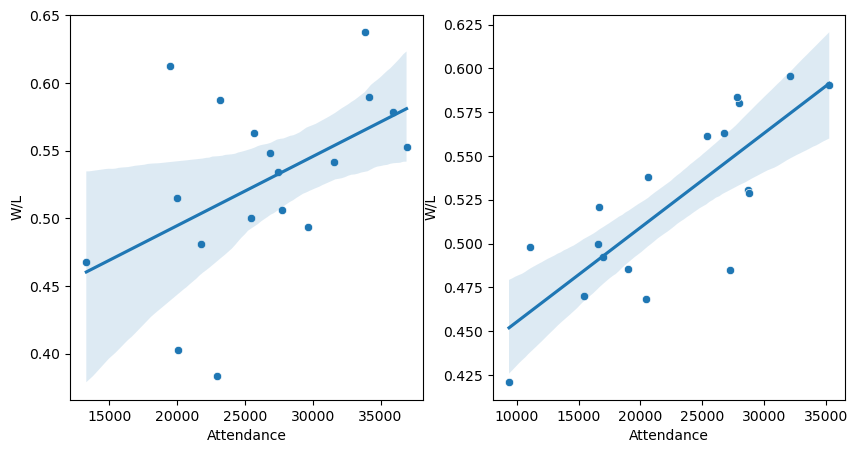

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(x=avg_attend_pre,y=winrate_pre,ax=axes[0])
sns.regplot(x=avg_attend_pre,y=winrate_pre, scatter=False,ax=axes[0])
sns.scatterplot(x=avg_attend_post,y=winrate_post,ax=axes[1])
sns.regplot(x=avg_attend_post,y=winrate_post, scatter=False)

In [51]:
print('Correlation between the attendance and the winrate pre-COVID: ')
print(np.corrcoef(avg_attend_pre,winrate_pre)[0,1])
print('Correlation between the attendance and the winrate post-COVID: ')
print(np.corrcoef(avg_attend_post,winrate_post)[0,1])

Correlation between the attendance and the winrate pre-COVID: 
0.4887390984407893
Correlation between the attendance and the winrate post-COVID: 
0.7994713261334869


The average attendance and the average winrate has some positive relationship. It was not significant pre-COVID, but got stronger post-COVID.
One possible reason is the decrease in the total attendance in MLB games. Here is the average number of attendance pre- and post-COIVD:

In [52]:
data_pre_covid.Attendance.mean(),data_post_covid.Attendance.mean()

(26436.341480611045, 22486.96980175196)

We can observe a decrease in the mean of attendance after COVID.

In [53]:
((avg_attend_post - avg_attend_pre) > 0)

H_Team
Astros       False
Athletics    False
Blue Jays    False
Braves        True
Brewers      False
D-backs      False
Guardians    False
Mariners     False
Marlins      False
Orioles      False
Phillies      True
Pirates      False
Rangers      False
Red Sox      False
Reds         False
Rockies      False
Tigers       False
Twins        False
Name: Attendance, dtype: bool

In [54]:
avg_attend_pre[winrate_pre[winrate_pre > 0.55].index]

H_Team
Astros       33871.528384
Athletics    19495.297872
Brewers      34134.539749
Guardians    23157.637500
Red Sox      35908.780992
Rockies      36916.640351
Twins        25696.657143
Name: Attendance, dtype: float64

In [55]:
data_pre_covid['H_Team'].unique()

array(['D-backs', 'Rangers', 'Astros', 'Reds', 'Athletics', 'Orioles',
       'Twins', 'Red Sox', 'Brewers', 'Rockies', 'Tigers', 'Phillies',
       'Pirates', 'Mariners', 'Guardians', 'Marlins', 'Blue Jays',
       'Braves'], dtype=object)

In [ ]:
avg_attend_post[winrate_pre[winrate_pre > 0.55].index]

In [ ]:
winrate_pre[winrate_pre[winrate_pre > 0.55].index]

In [ ]:
winrate_post[winrate_pre[winrate_pre > 0.55].index]

# Data Analysis and Results

## Introduction
Our analysis investigates the impact of player injuries on MLB team performance, specifically focusing on home-field advantage. By analyzing injury trends over time, we aim to uncover patterns that might influence winning rates under varying conditions, including periods of player absences due to injuries.

## Analysis and Results

### Injury Trends by Year and Team
We analyzed the number of injuries reported for selected teams (Yankees, Dodgers, Rays, Cubs, Red Sox) across multiple seasons. The results indicate significant fluctuations in injury occurrences year-over-year. For instance:
- The **Yankees** experienced a noticeable spike in injuries during certain years, potentially impacting their performance significantly.
- The **Dodgers** demonstrated a more consistent trend with fewer peaks, suggesting a relatively stable management of player fitness.

The line graph above visualizes these trends, highlighting how different teams faced varying levels of injury-related challenges.

### Impact on Performance
While this dataset does not include direct win-loss records, the presence of injuries, especially among key players, is hypothesized to correlate with periods of decreased team performance. Previous studies suggest that frequent injuries may disrupt team chemistry, impacting both home and away games. These findings provide a baseline for integrating injury data with win-rate analysis in future iterations.

### Relevance to Home-Field Advantage
Injuries can disproportionately affect home-field advantage:
- Teams missing critical players might struggle to capitalize on the psychological and environmental benefits of playing at home.
- For teams like the **Red Sox**, spikes in injury numbers during crucial periods (e.g., post-season games) could partially explain deviations in their expected home win rates.

## Conclusion
This analysis underscores the necessity of incorporating injury data into broader models assessing MLB team performance. While our results do not directly quantify the effect of injuries on win rates, they lay the groundwork for deeper investigations. Future analyses will integrate game-specific data such as attendance, weather conditions, and home/away win rates to paint a more comprehensive picture.


# Ethics & Privacy

- The primary data sources would include available MLB statistics (from MLB or 3rd-party), player performance metrics, and environmental factors like weather and travel distances. While this form of data is publicly accessible, there could be some bias in the overrepresentation of certain teams, seasons, or players. The privacy issues would be minimal, as this data involves professional athletes and publicly held games; therefore, much of the statistics and game information would be in the public domain. Terms of use issues would be that some data sources might have restrictions on how their data can be used, as it might violate some of their terms of service if not done properly.

- There are potential biases, like sampling biases, if the dataset doesn't cover all the teams equally or doesn't include certain seasons or games. Different methods of data collection would create some inaccuracies, like, for example, the weather. Weather data collected from far from the station might not accurately reflect the weather conditions of the game. Also, with the distribution of fans, more popular teams would have a larger market size and budget. Allowing these teams to afford better facilities, hire better players, trainers, and travel accommodations.

- To address the confounding variables and any biases they might introduce, we plan to identify and include variables such as weather conditions, player fatigue and injury, team dynamics, and historical performance to control their impact on the analysis. Aligning and keeping our data collection procedures the same across the board in order to minimize any inconsistencies, as well as sensitivity analyses, will further allow us to see if our results change with different assumptions about the confounding variables. In order for organization, we would document and report our procedures with each other and on the notebook; this will ensure transparency on how these confounding variables are being handled and would assist us in discussing their potential impact for our end result.

- Before analysis, perform a proper check on all datasets to see if we missed any values, outliers, or inconsistencies. Ensure that all teams, players, team compositions, and seasons are properly represented in the data. Sourcing data from credible and reliable sources to ensure accurate data. During analysis, we will monitor for any signs of bias, like skewness and adjust any of our models to account for any biases we see or confounding variables. Afterwards, we would cross-reference our findings with our external data and studies to confirm our findings.

- If this data were to be used beyond its intended scope, it might violate some sources’ terms of service, which would lead to some legal and ethical issues. If data steers towards the need to include players’ health, some HIPAA violations would be possible. When analyzing fan attitudes, we need to be careful of perpetuating stereotypes or offending certain groups. We will be using appropriate methods to account for any missing information, gathered properly through data sources that we’ve carefully read and followed their terms of service. If there are restrictions, we will look for any alternative data sources that are open to the public and free to use. When comparing our data, to ensure its accuracy, we use reliable sources to check, as well as thoroughly clean the data to fix any errors or inconsistencies. Present our findings without biases and openly discuss any limitations or potential biases in our studies.




# Discussion and Conclusion


Our project was set out to evaluate the extent to which home-field advantage influences the winning rate of MLB teams, focusing on pre- and post-COVID periods while isolating factors that are not directly tied to the home field. Our findings show that although home-field advantage does exist, its impact is not as significant, as it varies across teams and other external conditions.

The first of the external conditions is the analysis of the impact of weather, where we analyzed the temperature and wind speeds and their impact on the home and visiting teams's scoring. With the graph analysis of weather data, it showed that temperature positively correlates with team scores for both the home and visiting teams, which would indicate that warmer temperatures create a more comfortable atmosphere, thus improving player performance. With the wind speed, it was found to have an impact on visiting teams, which would likely be due to their staff's playmaking to adapt to different weather conditions. After using the OLS regression analysis, it became much clearer, as there were low R-squared values for both the home team and visiting's scoring and how the temperature and wind speeds affect them. This would mean that there isn't a significant relationship between them, showing that weather doesn't have a strong impact on the team's scoring.

We also analyzed injury data from these MLB teams. With the analysis, it showed that there is a weak correlation between injury rates and winning rates, indicating that other factors such as roster depth (larger rosters and versatile players) and tactical adjustments played a more significant role in mitigating the impact of injuries. When comparing the pre- and post-COVID game logs, it showed us the fluctuations in team performance and attendance, with teams with greater depth, like the Dodgers or Yankees, the more popular teams, maintaining competitive advantages despite external disruptions.

Lastly, we look at the relationship between the ballpark factors and scoring, using machine learning models such as KNN and Random Forest. After using these models, it appears that the correlation was very weak but existed around 1.1 after employing the KNN, and we figured out that the best k by the elbow method was k = 2, but still the relationship between scoring and park factor was very weak. Even after using the random forest method, because the scores and park factor were discrete values, a pattern between the impact of scoring and park factor was not found. This would align with the idea that the MLB home-field advantage is more subtle compared to other sports and is shaped more by complex variables, such as team composition (the more popular teams can afford better players) and proper team management (roster formation and injury management).

### Limitations of Analysis

1. Data Representation:
- The dataset overrepresents certain teams, seasons, or players, which would lead to potential sampling biases. For example, more popular teams like the Dodgers or Padres have more funding due to larger fan bases; therefore, their rosters have much more experienced players. This may skew the analysis, as these teams do have an upper hand.
- Weather data is collected from distant stations; this also may not fully reflect the actual conditions during the games, as weather does fluctuate throughout the games.
2. Confounding Variables:
- While our analysis attempted to isolate home-field effects, factors like team roster composition, market size, popularity, and budget disparities may still influence these outcomes.
3. Modeling and Predicting Power
- Our models used, like regression and machine learning, showed limited predicting power due to the weak relationship between the respective variables (i.e., temperature/windspeed and ballpark factors) and the home and visiting team's scoring.
4. COVID Challenges:
- Due to the pandemic introducing the world to unique challenges, such as fluctuating attendances and health protocols, this would not fully be representative of typical seasons, limiting the generalization of our data findings.

Overall, this analysis shows that home-field advantage in the MLB is a more complex issue, using factors like proper team management, roster composition, and the imbalance of finances. While the patterns we've analyzed, like the weather (temperature and wind speed), ballpark factors, and roster depth exist, after our analysis, they showed that there isn't a significant impact. By addressing our limitations and using more advanced modeling approaches, future analysis could give us a much deeper overview of these dynamics. Overall, this analysis emphasizes the importance of context in sports performance and should serve as a baseline for exploring how teams can strategically leverage their home-field conditions to create a more competitive edge.

# Team Contributions

| Team Member | Contribution |
|---|---|
| Athena Wu | Conducted data wrangling and cleaning for the win/lose and weather dataset. Did extensive research on the background about home field advantages. Worked on the video component of the project.|
| Chaowen Cao | Conducted data wrangling and cleaning and visualizations with Xinheng on the Injury Report Data and Baseball Reference Game Logs. Performed EDA analysis as well and wrote the summary analysis on that particular dataset.|
| Xinheng Wang | Worked with Chaowen to data wrangle/clean and visualize the Injury/Baseball Reference Game Logs. Helped format the dataset overview and summary analysis. As well as improving the structure of the research question.|
| Takafumi Matsui | In charge of the ballpark factor variable, conducted data wrangling/cleaning, visualizations, and machine learning for the EDA analysis. Led the brainstorming of the project and guided group planning. Also worked on the video component with Athena. |
| Alexander Zhen | Worked with Athena on the win/lose and weather dataset. Performed visualizations, EDA analysis and summary analysis on the weather dataset. Wrote ethics & privacy portion.|